### Download Dataset

**Upload kaggle api for downloading dataset from kaggle**

---





In [488]:
# from google.colab import files
# files.upload()
# !mkdir ~/.kaggle
# !mv *.json kaggle.json
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

**Downloading dataset and unzip the dataset**

---



In [489]:
# !kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

In [490]:
# !unzip *.zip

# EDA 

### Importing packages

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Analysis

In [492]:
df = pd.read_csv("zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

**Datatypes of every columns**


---



In [493]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [494]:
drop_cols = ["url","address","phone"]

In [495]:
df.drop(drop_cols,inplace = True, axis = 1)
df.head(2)

name online_order book_table   rate  votes      location  \
0           Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1  Spice Elephant          Yes         No  4.1/5    787  Banashankari   

       rest_type                                         dish_liked  \
0  Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

* removing url, address, phone features 
  * because they are unnecessary for this probelm

In [496]:
df.duplicated().sum()

63

In [497]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

* removed 63 duplicate records [ rows ]

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51654 non-null  object
 1   online_order                 51654 non-null  object
 2   book_table                   51654 non-null  object
 3   rate                         43894 non-null  object
 4   votes                        51654 non-null  int64 
 5   location                     51633 non-null  object
 6   rest_type                    51427 non-null  object
 7   dish_liked                   23627 non-null  object
 8   cuisines                     51609 non-null  object
 9   approx_cost(for two people)  51309 non-null  object
 10  reviews_list                 51654 non-null  object
 11  menu_item                    51654 non-null  object
 12  listed_in(type)              51654 non-null  object
 13  listed_in(city)              51654 n

Observations:
  * name => is a nominal data
  * online_order => should convert into [yes => 1, no => 0]
  * book_table => should convert into [yes => 1, no => 0]
  * dish_liked => dishes people liked in that rest. 
      * so we don't actually required this for predictive model [we can drop this]
  * rate -> contain null values 

**Checking null values**


---


In [499]:
### check null values

def null_values_percentage(df):
  total_count = df.shape[0]
  print(f"-------------------> {total_count} [records] <-------------\n")
  for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{null_count/total_count*100:0.3f}% \t:\t {col}")

null_values_percentage(df)

-------------------> 51654 [records] <-------------

0.000% 	:	 name
0.000% 	:	 online_order
0.000% 	:	 book_table
15.023% 	:	 rate
0.000% 	:	 votes
0.041% 	:	 location
0.439% 	:	 rest_type
54.259% 	:	 dish_liked
0.087% 	:	 cuisines
0.668% 	:	 approx_cost(for two people)
0.000% 	:	 reviews_list
0.000% 	:	 menu_item
0.000% 	:	 listed_in(type)
0.000% 	:	 listed_in(city)


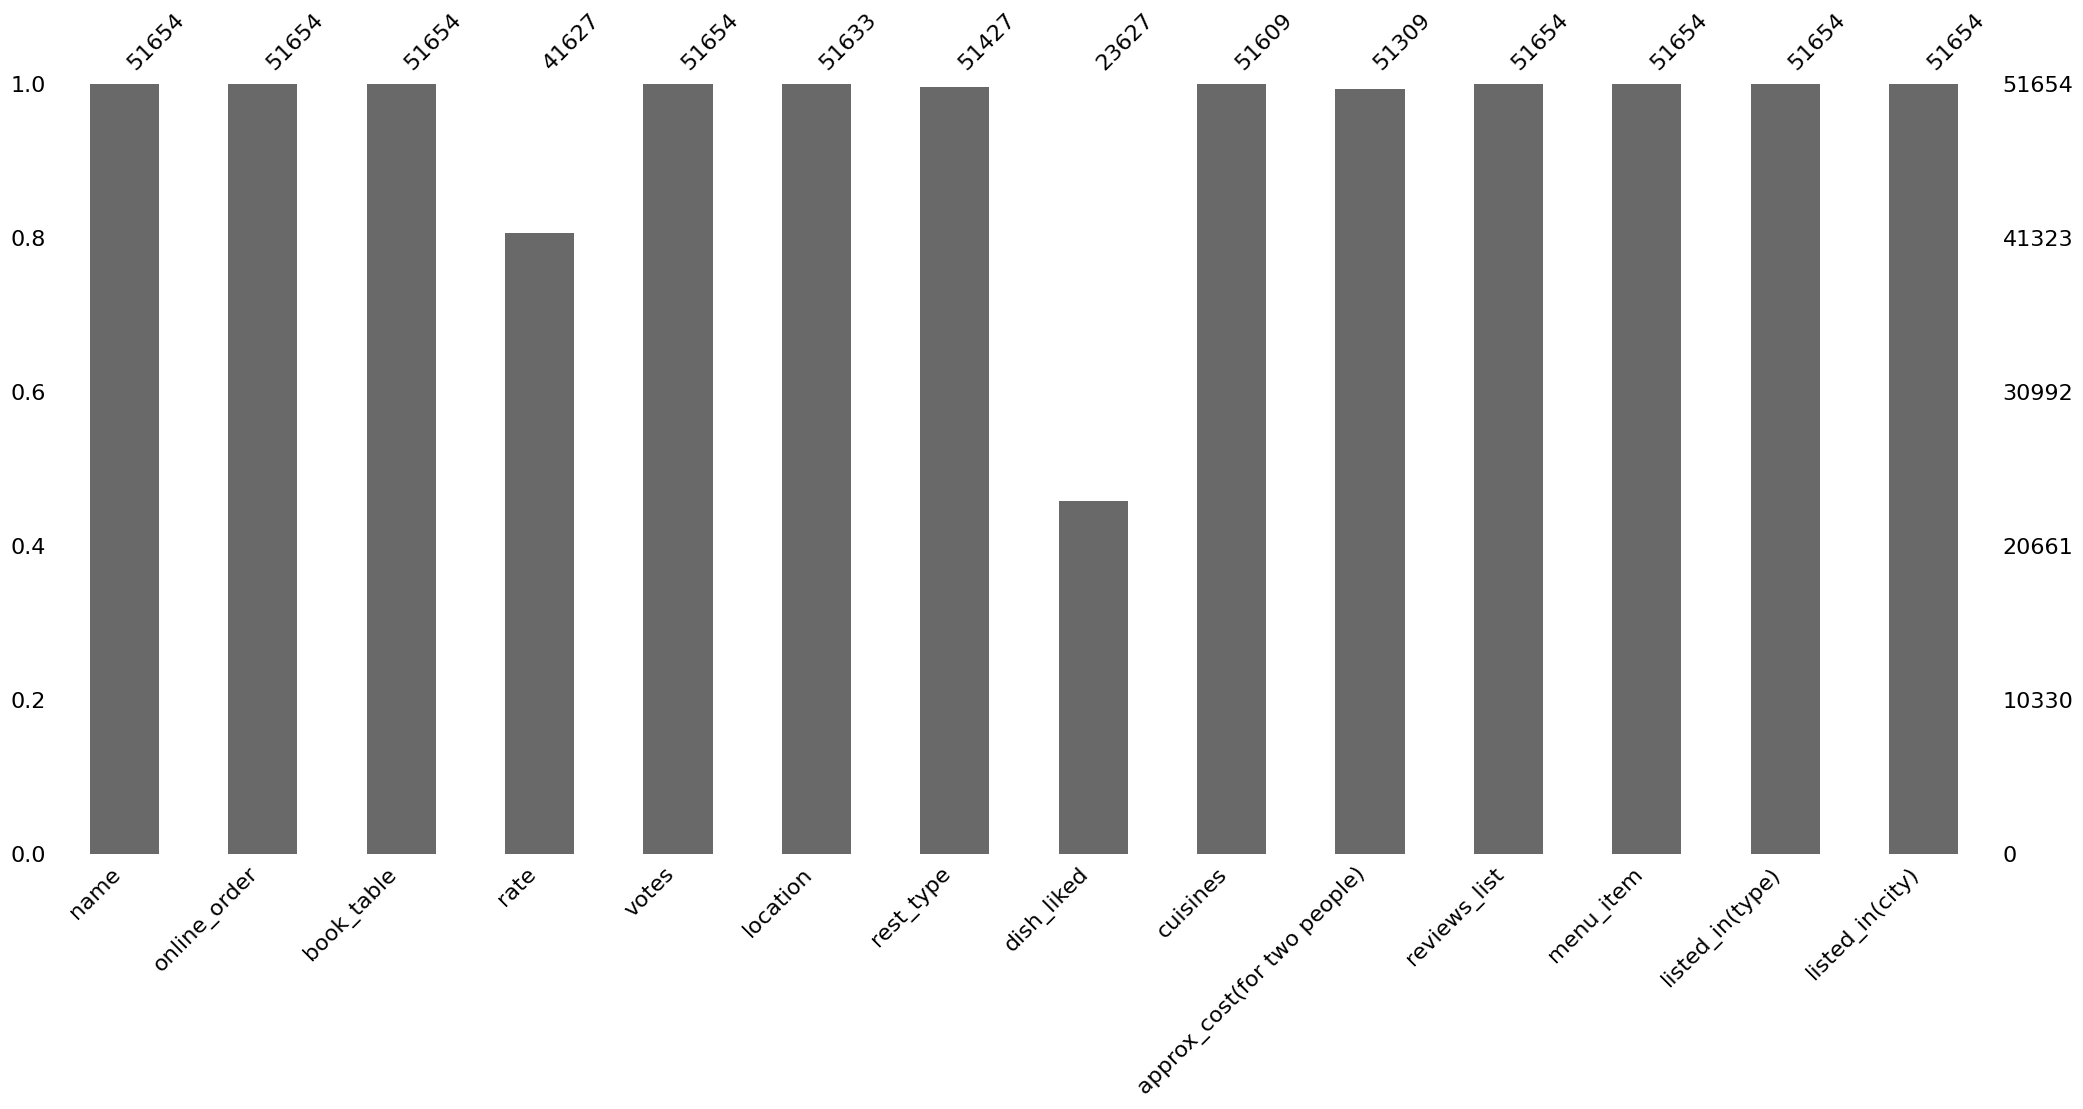

In [500]:
import missingno as msno

# converting NEW and '-' values into null value 
def convert(x):
  if x in ["NEW","-"]:
    return np.nan
  return x

df["rate"] = df["rate"].apply(convert)
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()

Observation:
  * dish_liked :- contain 54% null values
  * rate       :- contain 15% null values
  * location, rest_type, cuisines, approx_cost also contain null values but small amount ( total 1% )
    * but these features are importent in prediction of a restaurant rating so we can drop the null rows

In [501]:
drop_null_rows = ["location", "rest_type", "cuisines", "approx_cost(for two people)"]
df = df.dropna(subset = drop_null_rows,axis = 0)
null_values_percentage(df)

-------------------> 51086 [records] <-------------

0.000% 	:	 name
0.000% 	:	 online_order
0.000% 	:	 book_table
19.301% 	:	 rate
0.000% 	:	 votes
0.000% 	:	 location
0.000% 	:	 rest_type
54.148% 	:	 dish_liked
0.000% 	:	 cuisines
0.000% 	:	 approx_cost(for two people)
0.000% 	:	 reviews_list
0.000% 	:	 menu_item
0.000% 	:	 listed_in(type)
0.000% 	:	 listed_in(city)


### fixing rate null values 

In [502]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

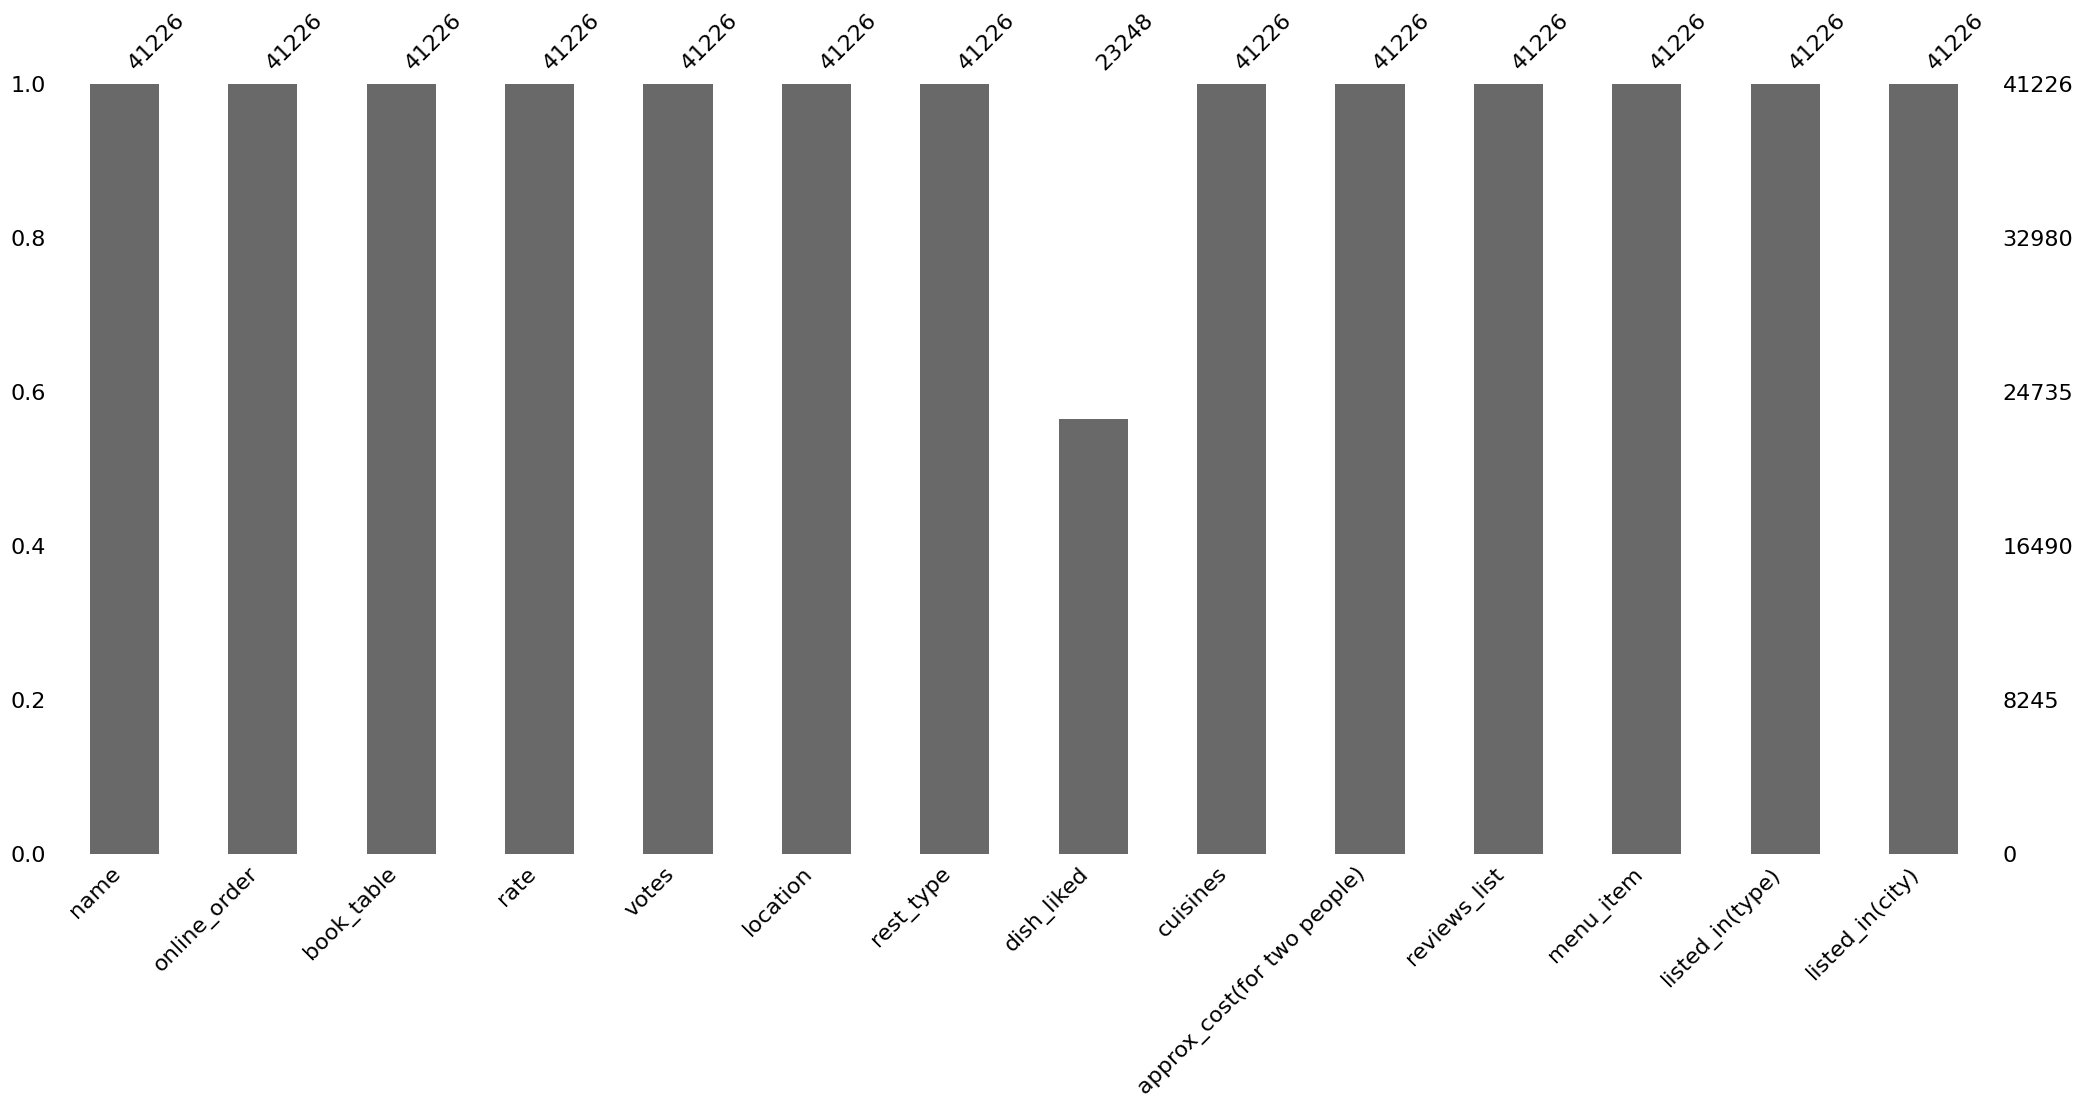

In [503]:
df = df.dropna(subset = ["rate"])
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()



---
**Dish Liked Information is unnecessary for this problem so we can drop the column after the EDA**

---



### Convert dtypes

In [504]:
df.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [505]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

**convert rating values into numerical format**

---



In [506]:
## convert rating values into numerical format
df["rate"] = df["rate"].str.split("/").str[0].astype(float)
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41226, dtype: float64

**convert approx_cost values into numerical format**

---





In [507]:
## convert approx_cost values into numerical format
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [508]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].str.replace(",","").astype(float)

**convert online_order and book_table into numerical ordinal forma**




---



In [509]:
## convert online_order and book_table into numerical ordinal format
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [510]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [511]:
df["book_table"]   = df["book_table"].map({"Yes" : 1 , "No" : 0})
df["online_order"] = df["online_order"].map({"Yes" : 1 , "No" : 0})

In [512]:
df.dtypes

name                            object
online_order                     int64
book_table                       int64
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object



---
**Other object type features should convert into numeric format by Either Label Encoding method or One Hot Encoding Method in Future      [ After EDA ]**



---



### Visualization

In [513]:
df.head()

name  online_order  book_table  rate  votes      location  \
0                  Jalsa             1           1   4.1    775  Banashankari   
1         Spice Elephant             1           0   4.1    787  Banashankari   
2        San Churro Cafe             1           0   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana             0           0   3.7     88  Banashankari   
4          Grand Village             0           0   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

**online order availability ratio**

---



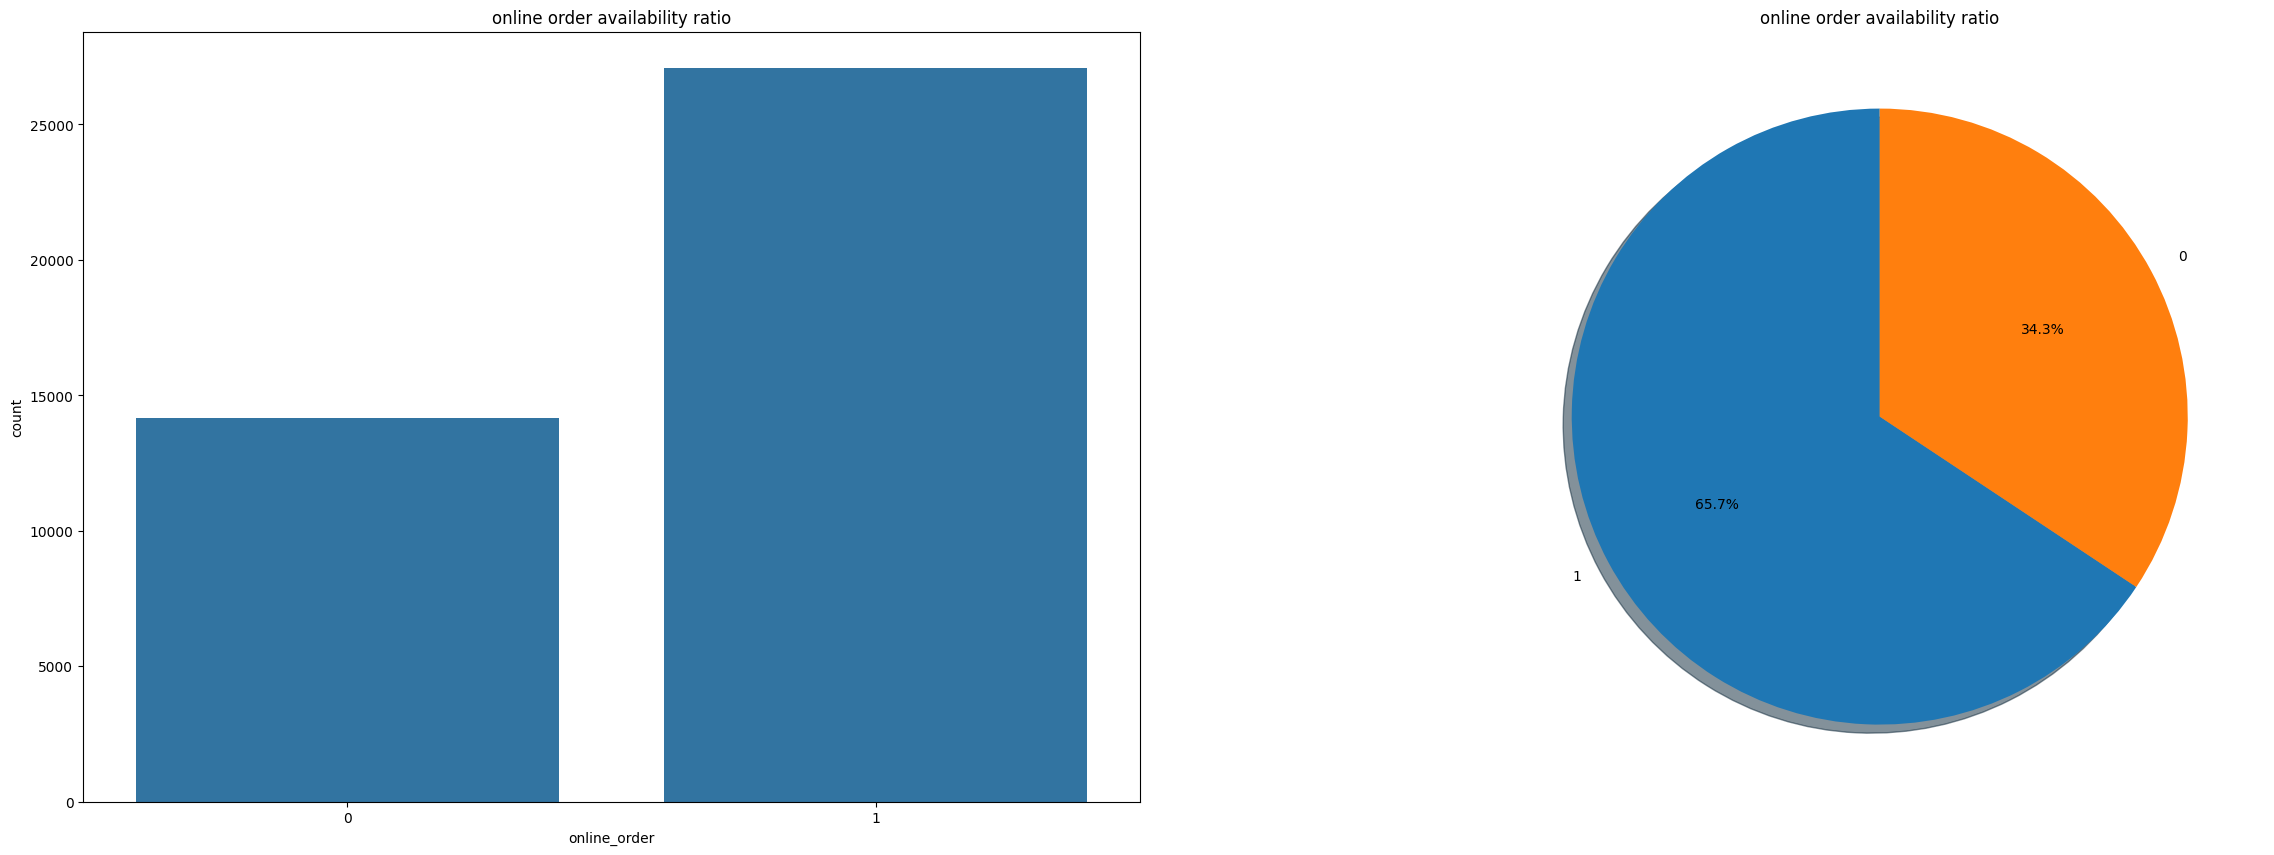

In [514]:
plt.rcParams["figure.figsize"] = (30,10)
fig1, (ax1 , ax2) = plt.subplots(1,2)
plt.title("online order availability ratio")
sns.countplot(data = df, x = "online_order", ax=ax1).set(title ="online order availability ratio")
labels = [1,0]
values = df['online_order'].value_counts().values
colors = ['blue', 'green']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('online order availability ratio')
plt.show()

**checking the relationship b\w online order and rating**


---



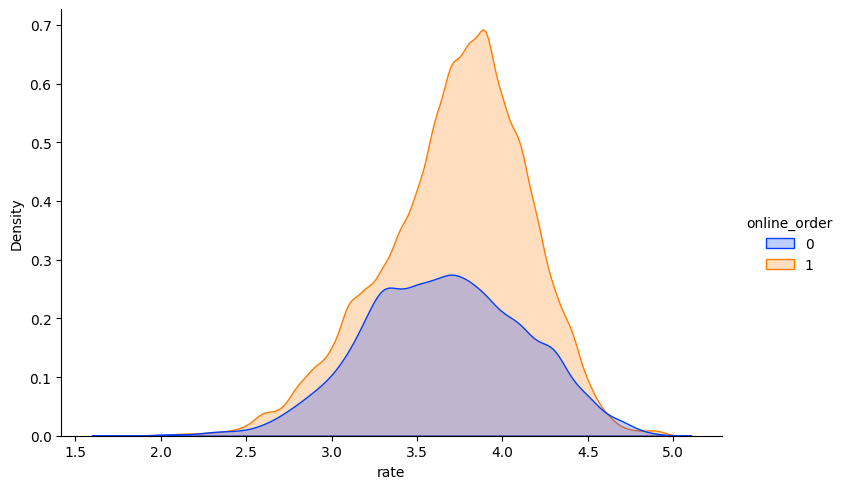

<Axes: xlabel='online_order', ylabel='rate'>

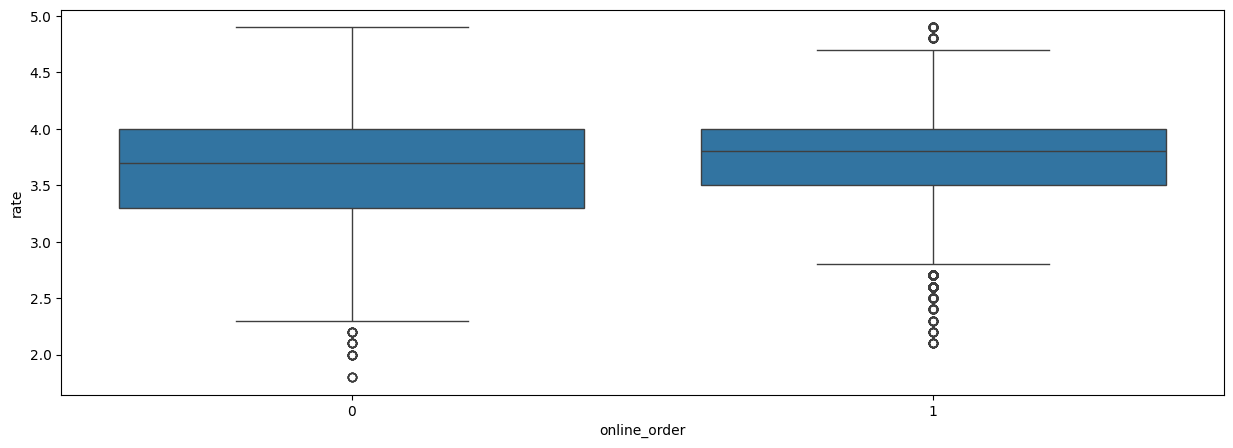

In [515]:
## checking the relationship b\w online order and rating 

sns.displot(data = df, x="rate", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (15,5))
sns.boxplot(data = df, y = "rate", x ="online_order")

**checking the relationship b\w online order and cost**


---


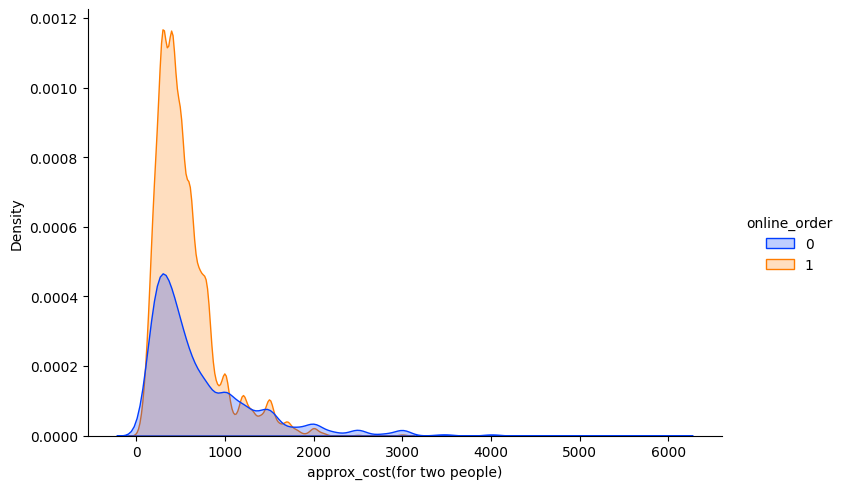

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

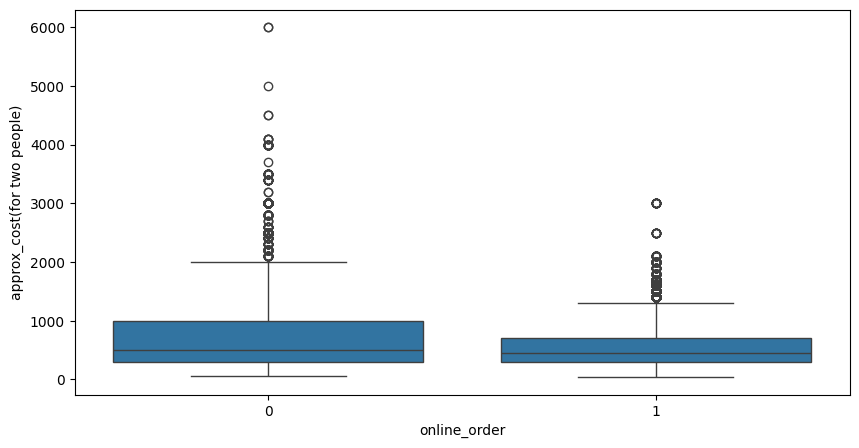

In [516]:
sns.displot(data = df, x="approx_cost(for two people)", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="online_order")

**Observation**:
  * most of the restarents in bangalore provide online orders
  * there is slight correlation b\w rating and online_ordering 
    * I belive when we do online ordering we mostly rate a resturant 

**table booking service availability ratio**

---



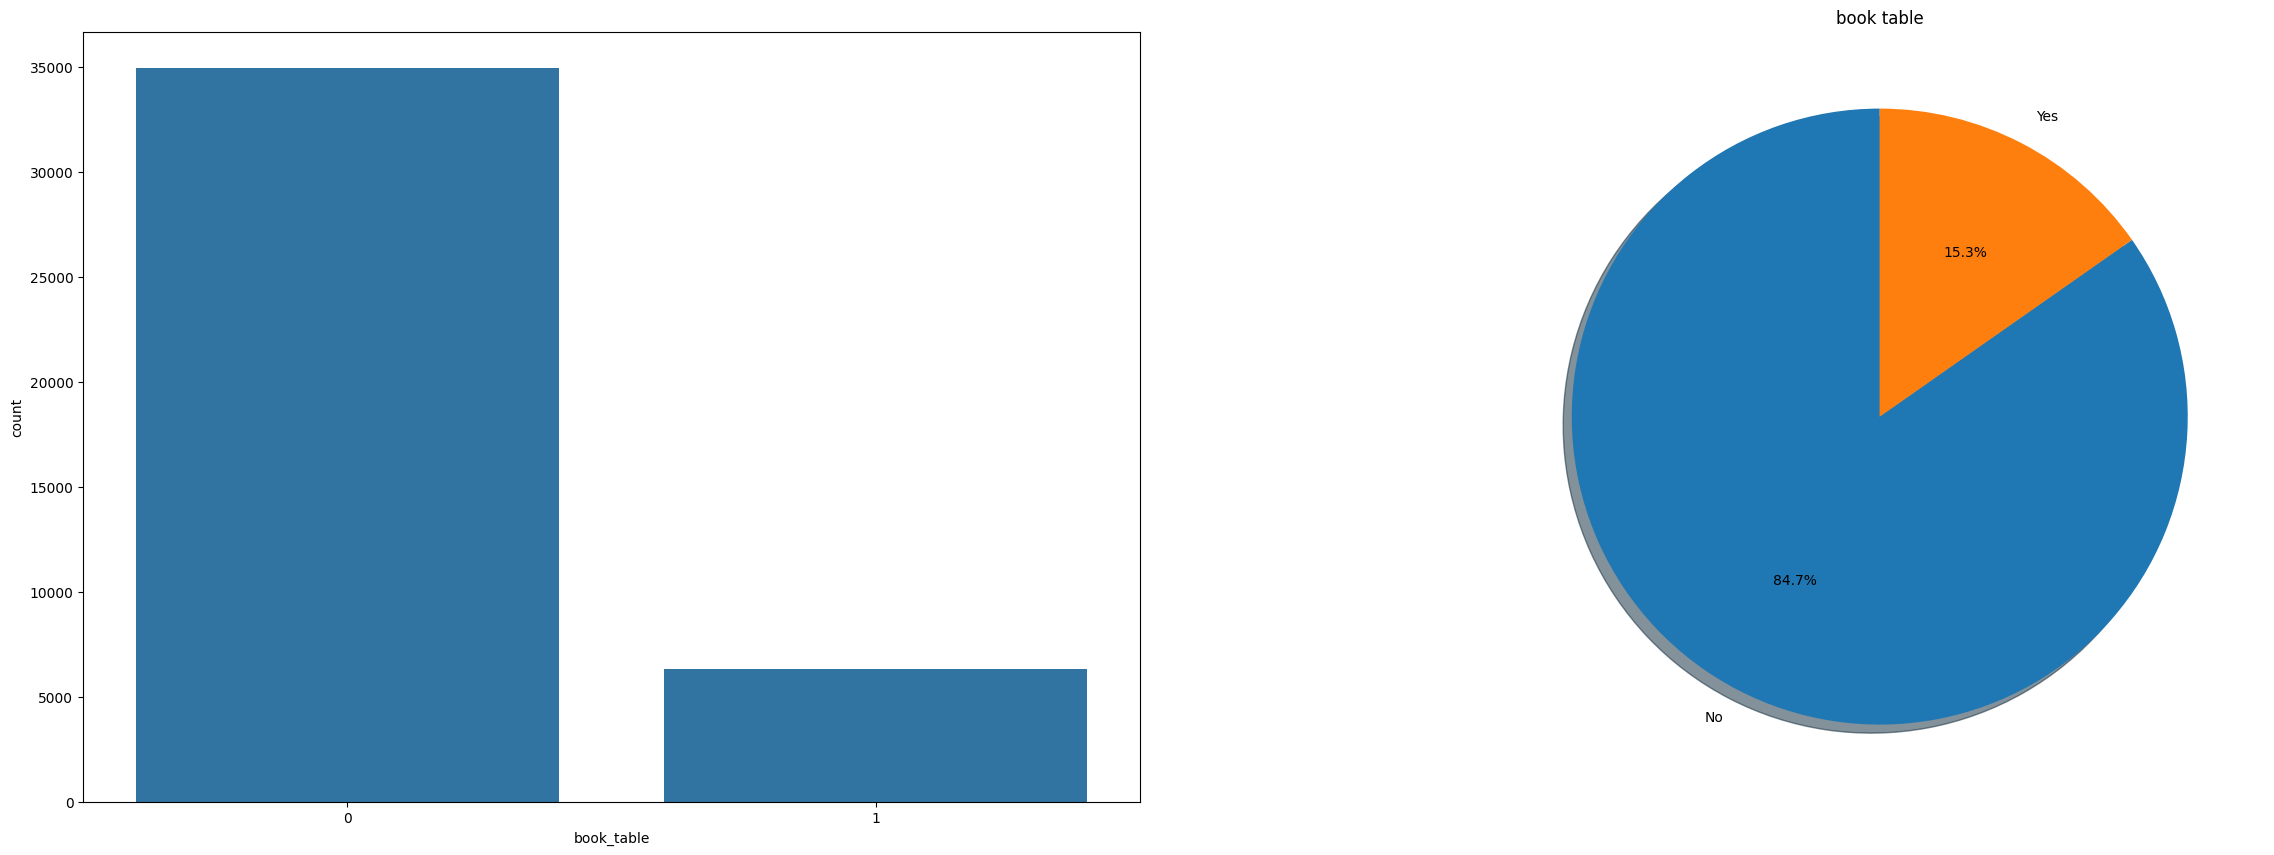

In [517]:
fig1, (ax1 , ax2) = plt.subplots(1,2)

sns.countplot(data = df, x = "book_table", ax=ax1)

labels = ["No",'Yes']
values = df['book_table'].value_counts().values
colors = ['green', 'blue']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('book table')
plt.show()

**checking the relationship b\w table booking and rating of resturant**


---


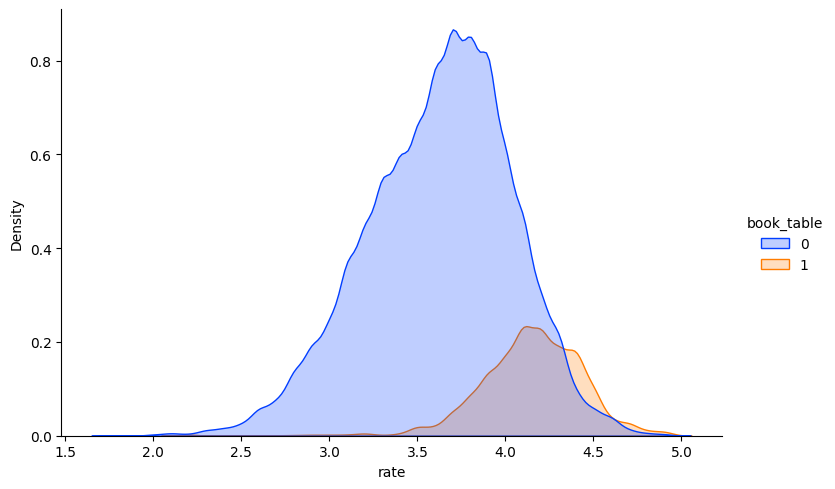

<Axes: xlabel='book_table', ylabel='rate'>

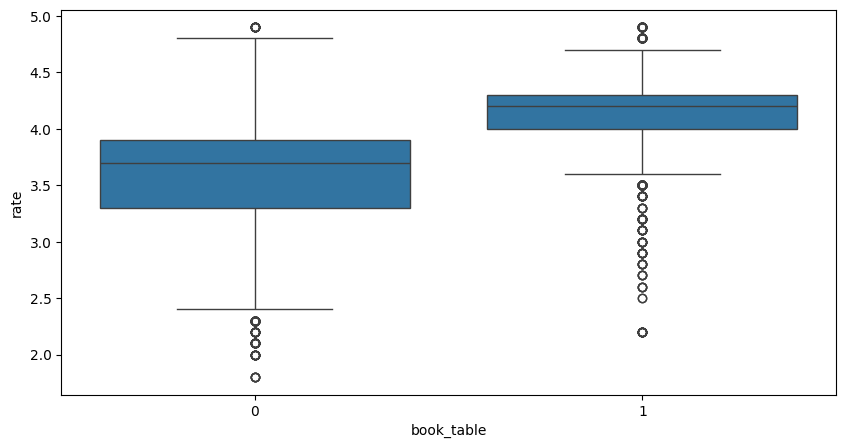

In [518]:
# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="rate", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "rate", x ="book_table")


**checking the relationship b\w table booking and cost of resturants**


---


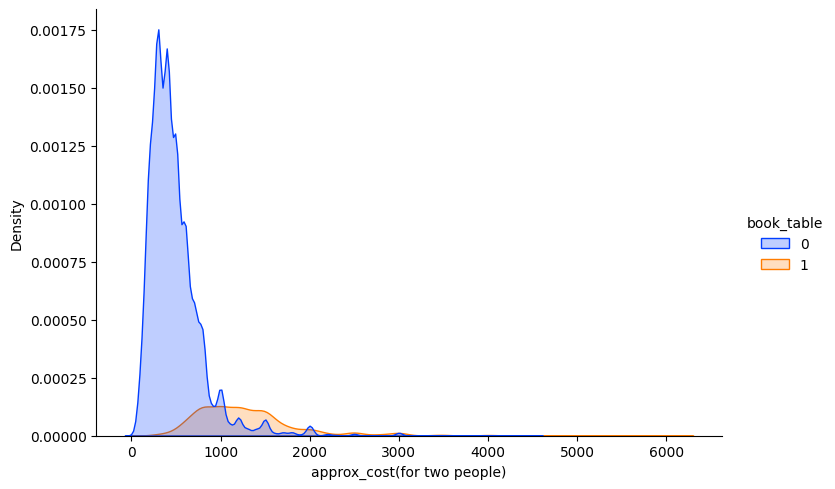

<Axes: xlabel='book_table', ylabel='approx_cost(for two people)'>

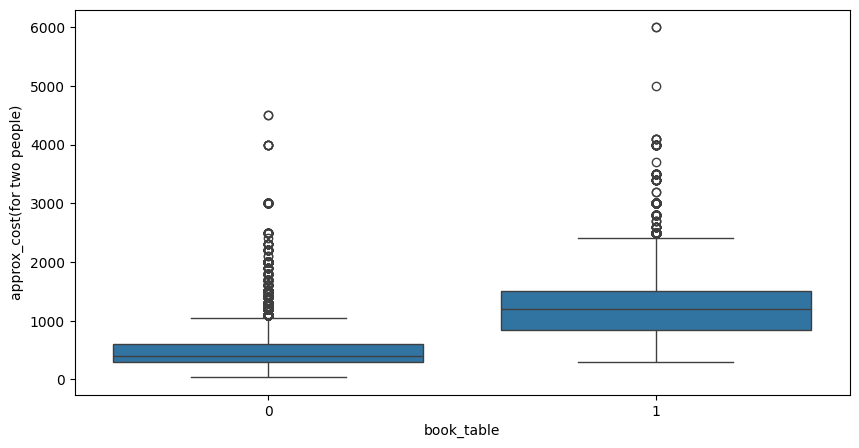

In [519]:
# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="approx_cost(for two people)", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="book_table")


**Observation**:
  * most of the restarent in bangalore are not providing table booking service
  * There is a **strong relationships** b\w **Table booking service and rating** of a resturant as well as **Table booking service and cost**

Checking the **rating distribution of all resturants** in the dataset **also relationship b\w rating and cost of the resturant**

---



<Axes: xlabel='new_rate', ylabel='approx_cost(for two people)'>

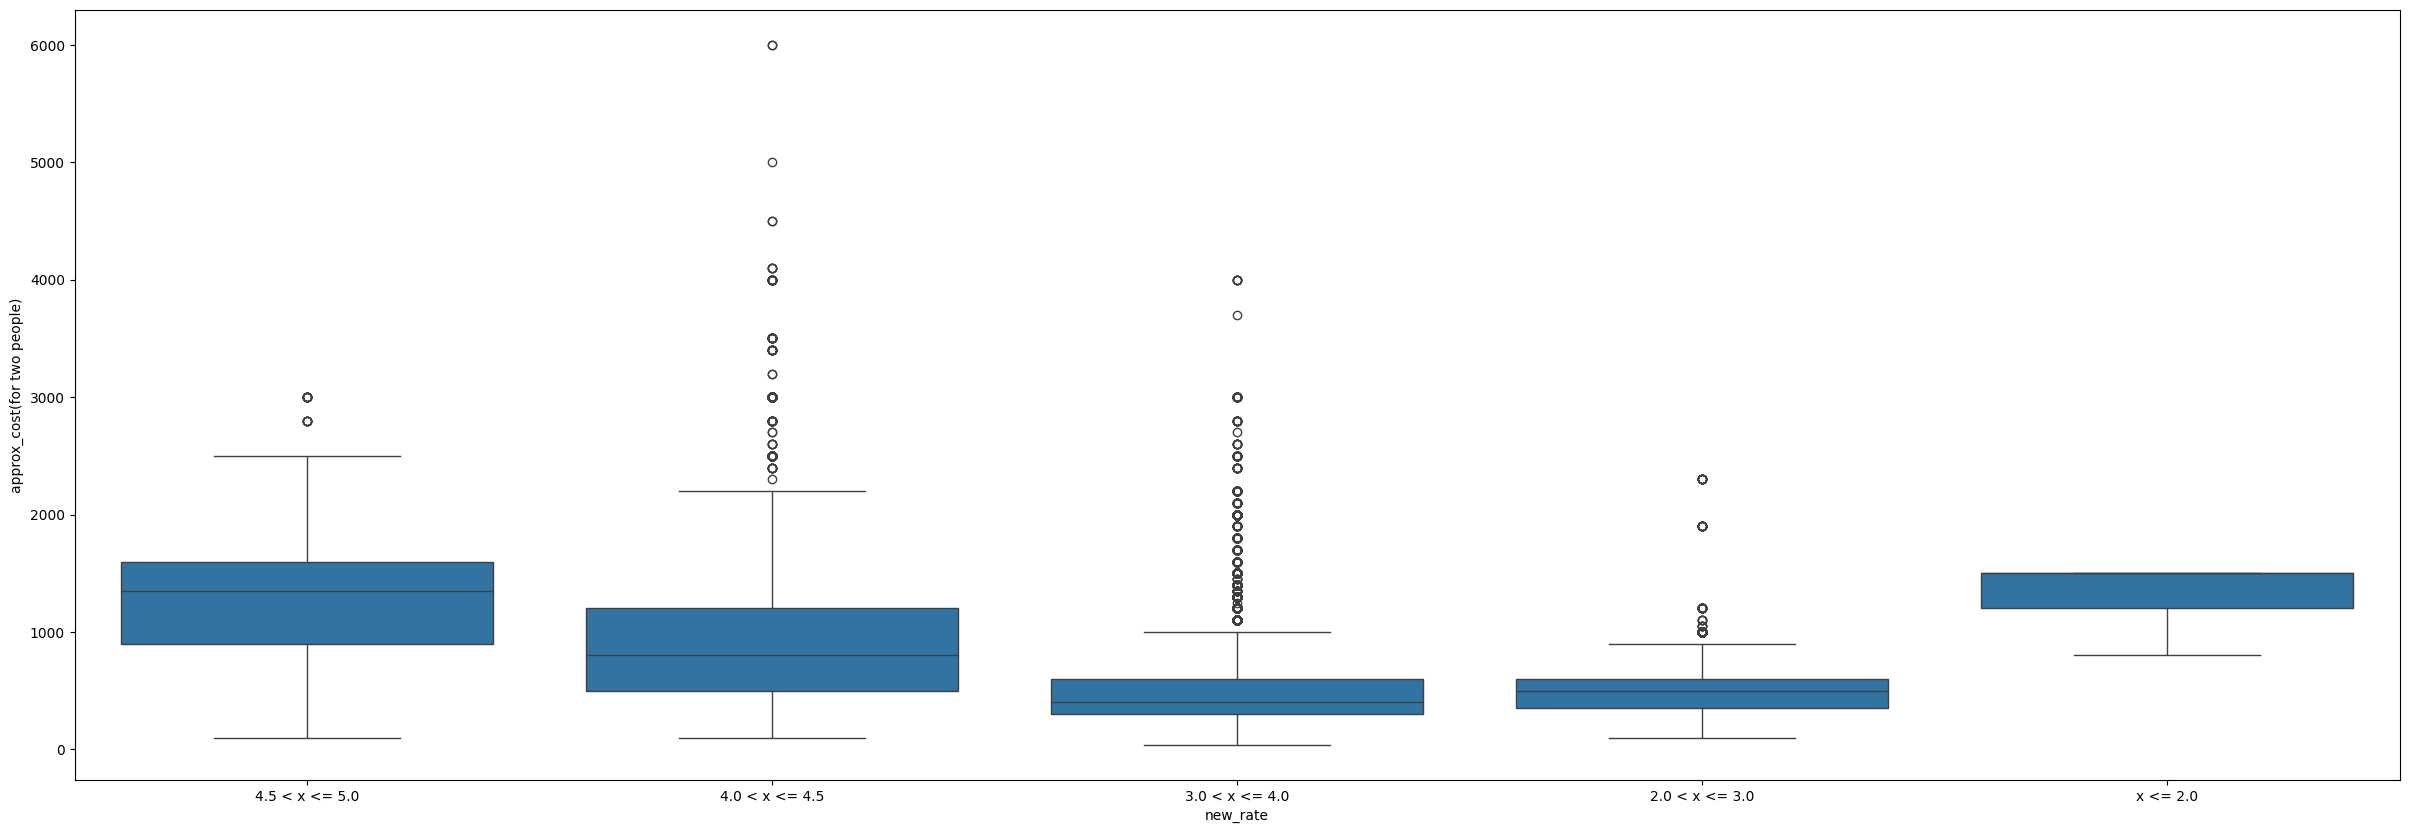

In [520]:
## price and rating relationship
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
test_df = df
test_df = test_df.sort_values(by=['rate'], ascending=False)
test_df.head()
test_df.dtypes
def transform(x):
  if x <= 2.0:
    return "x <= 2.0"
  if x <= 3.0:
    return "2.0 < x <= 3.0"
  if x <= 4.0:
    return "3.0 < x <= 4.0"
  if x <= 4.5:
    return "4.0 < x <= 4.5"
  else:
    return "4.5 < x <= 5.0"

test_df["new_rate"] = test_df["rate"].apply(transform)

sns.boxplot(data = test_df, y = "approx_cost(for two people)", x ="new_rate")

In [521]:
## mean cost values
print("mean cost\t\t rating values range \t number of records") 
print("--"*100)
for val in test_df["new_rate"].unique():
  rows = test_df[test_df["new_rate"] == val]
  mean_cost = rows["approx_cost(for two people)"].median()
  print(f"{mean_cost:.2f}  \t \t  {val} \t[{len(rows)}] ")

mean cost		 rating values range 	 number of records
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1350.00  	 	  4.5 < x <= 5.0 	[588] 
800.00  	 	  4.0 < x <= 4.5 	[8563] 
400.00  	 	  3.0 < x <= 4.0 	[28869] 
500.00  	 	  2.0 < x <= 3.0 	[3190] 
1500.00  	 	  x <= 2.0 	[16] 


**Observation:**

* in here the data distribution [ class of each rate ] is highly imbalanced
  * so we can perfom a classification task [ considering as a regression problem ]
  * There is strong relationship b\w rating and cost 
    * there is linear relationship [ rate directly proportional to rate ]
    * we can't consider the  `x <= 2.0` class
      * because we only have 16 records of it !!!


**Different resturant types in bangalore**


---



C:\Users\anakh\AppData\Local\Temp\ipykernel_6296\906930640.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'rest type')

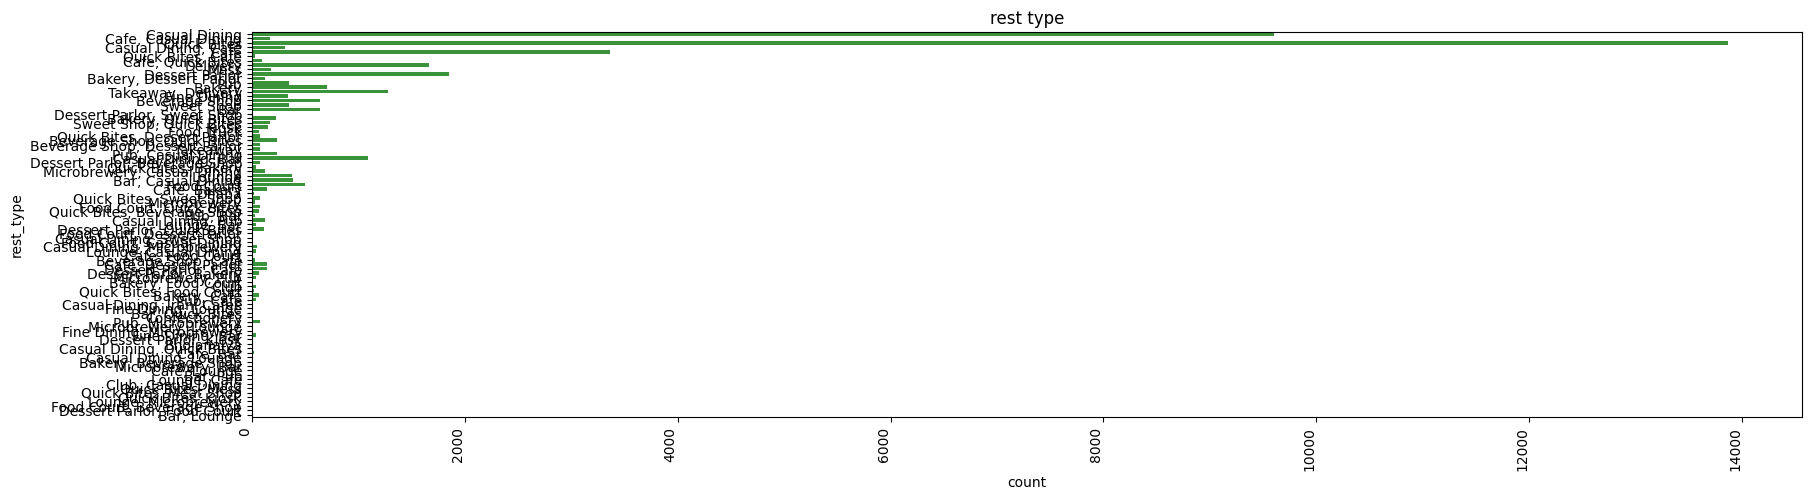

In [522]:
###
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest type')

**Observation:**
  * most of them are `casual dining` and `cafe`

**Resturant Locations in Bangalore**

---



C:\Users\anakh\AppData\Local\Temp\ipykernel_6296\848783753.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'rest locaiton wise count')

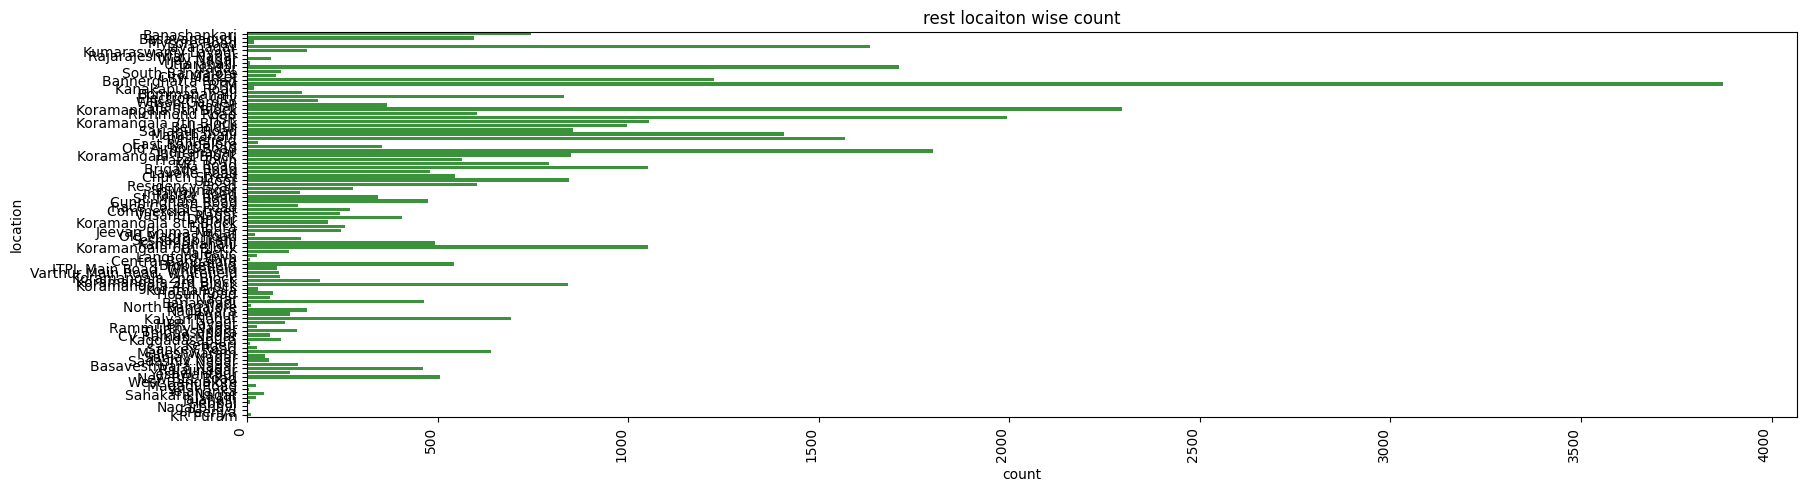

In [523]:

### most rest locations
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest locaiton wise count')

In [524]:
df["location"].value_counts()[:10]

location
BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1410
Bannerghatta Road        1224
Koramangala 7th Block    1055
Name: count, dtype: int64

Obeservations:
  - **most resturant location in bangalore** 
    1. BTM                      
    1. Koramangala 5th Block    
    1. HSR                      
    1. Indiranagar              
    1. JP Nagar                 
    1. Jayanagar                
    1. Whitefield               
    1. Marathahalli             
    1. Bannerghatta Road        
    1. Koramangala 7th Block    

In [525]:
# df["rest_type"].value_counts()[:31]

**converting least feaquent resturant types into `other` type**

---



In [526]:
df["rest_type"].value_counts()
cols = df["rest_type"].value_counts()[:10].index
def convert(x):
  if x in cols:
    return x
  else:
    return "other"


df["type"] = df["rest_type"].apply(convert)

In [527]:
## we only took top 30 rest_type others are making as "other catagory"
cols = df["rest_type"].value_counts()[:31].index
df["rest_type"] = df["rest_type"].apply(convert)

**Checking resturant type and rating relationship**

---



(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000'),
  Text(0, 4500.0, '4500')])

<Figure size 2000x1000 with 0 Axes>

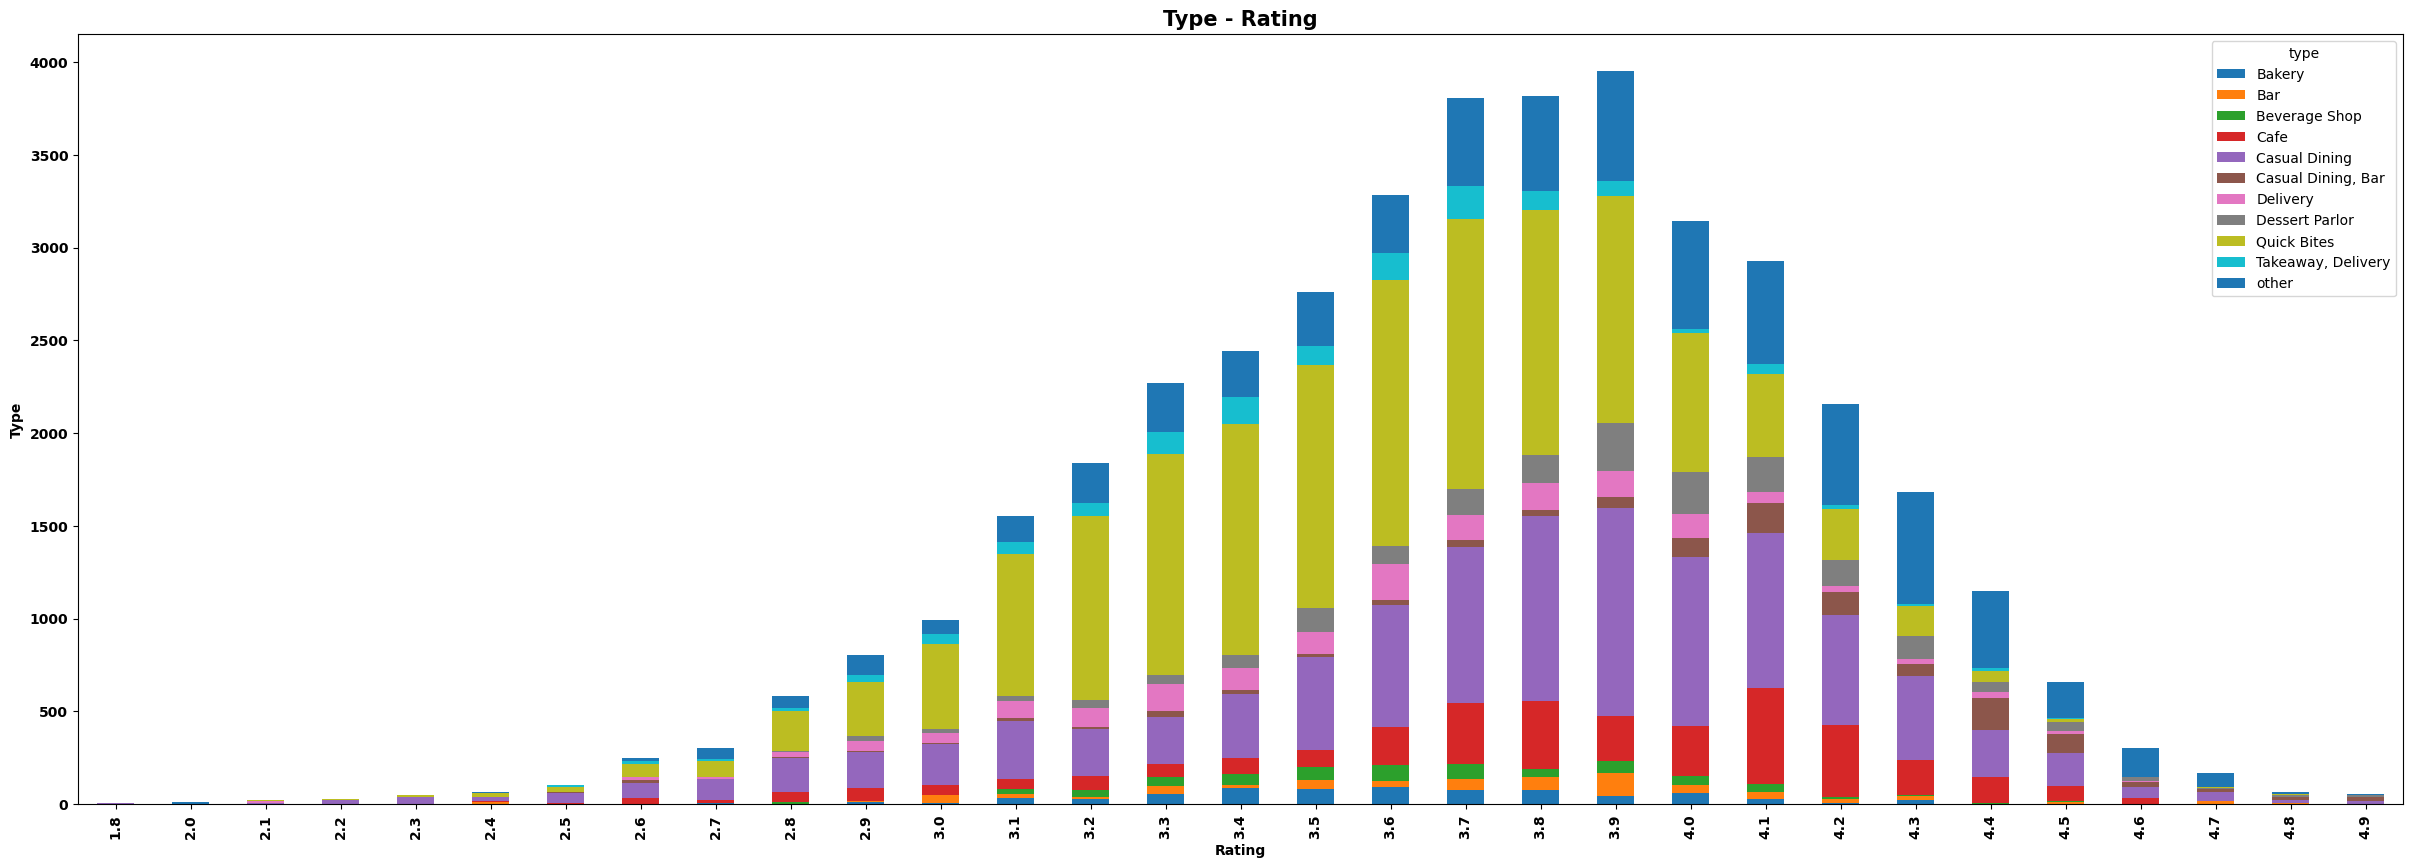

In [528]:
plt.figure(figsize = (20,10))
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

[Text(0.5, 1.0, 'Type - Rating')]

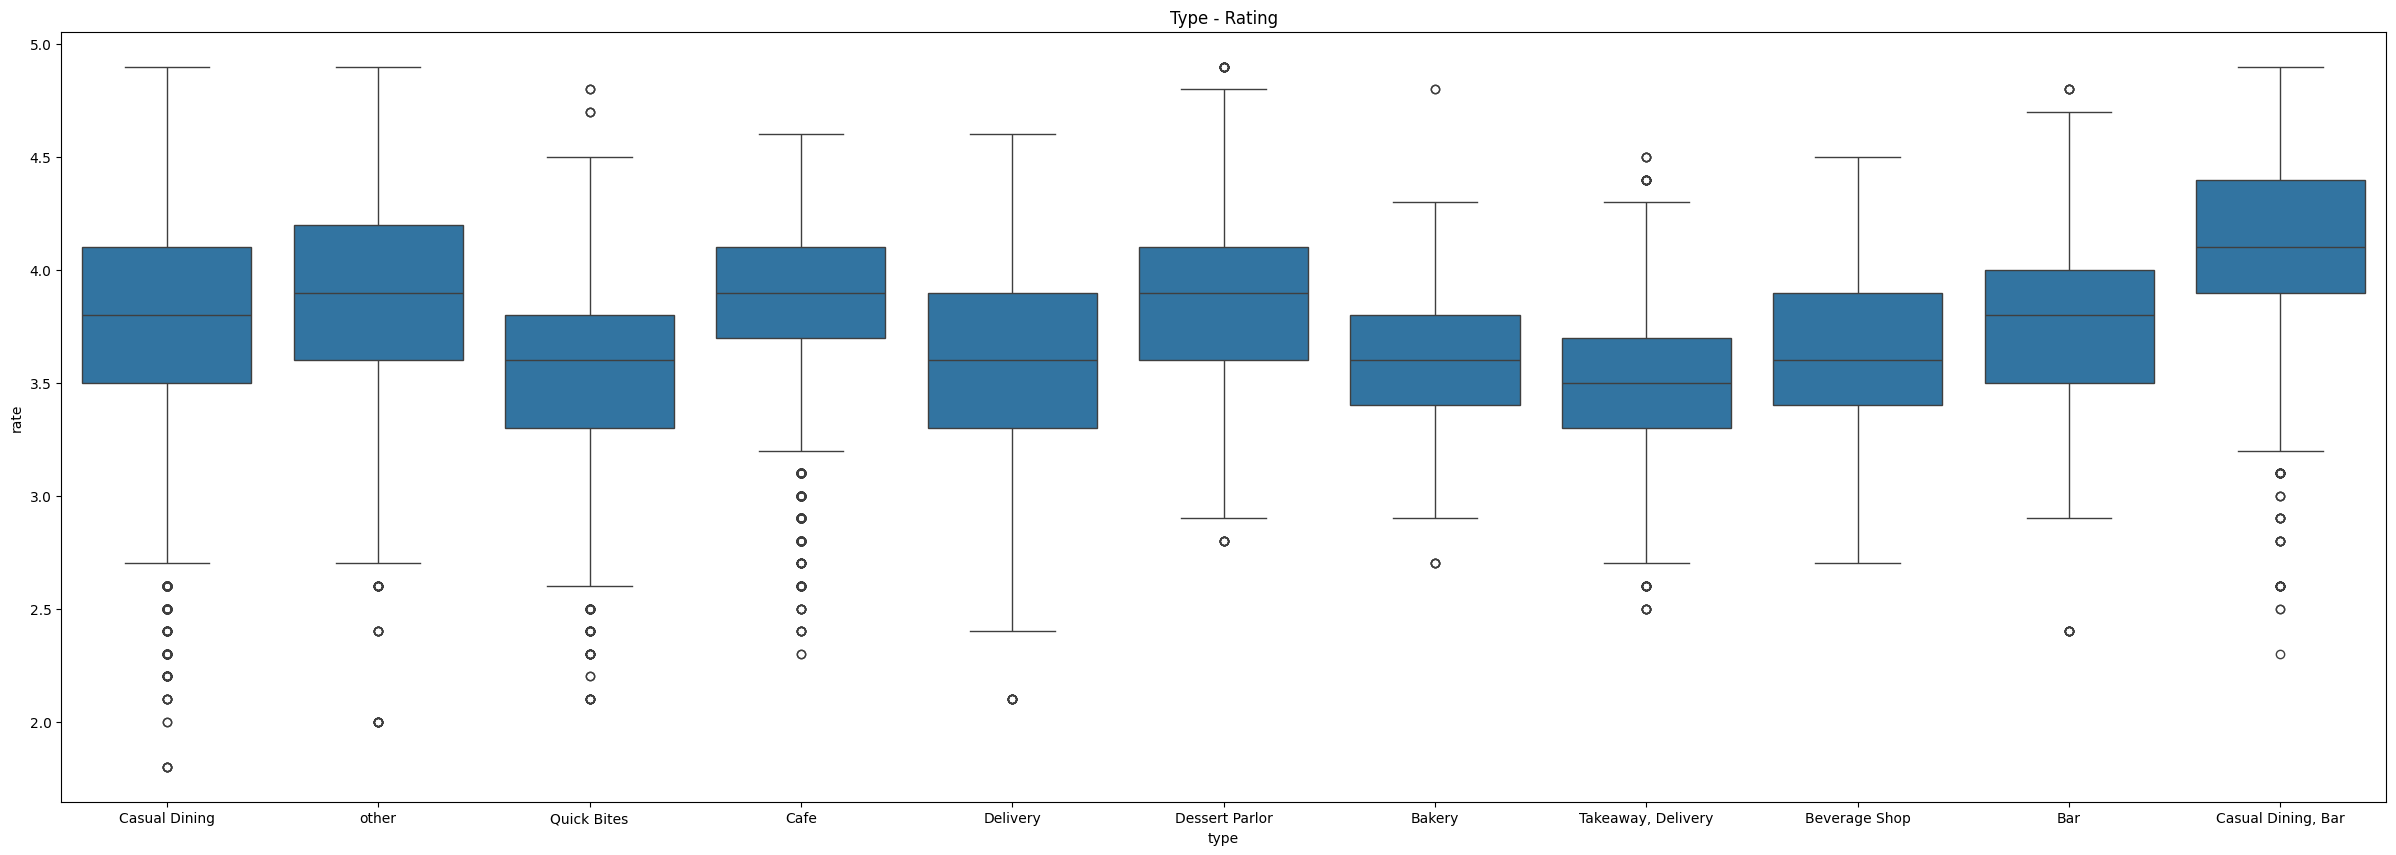

In [529]:
sns.boxplot(data = df, y="rate", x="type").set(title = "Type - Rating")

**Observations:**
  * most of the casual dining and quick bites having rating mean between 3.2 and 4.0 

**Checking resturant type and cost relationship**

---



(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

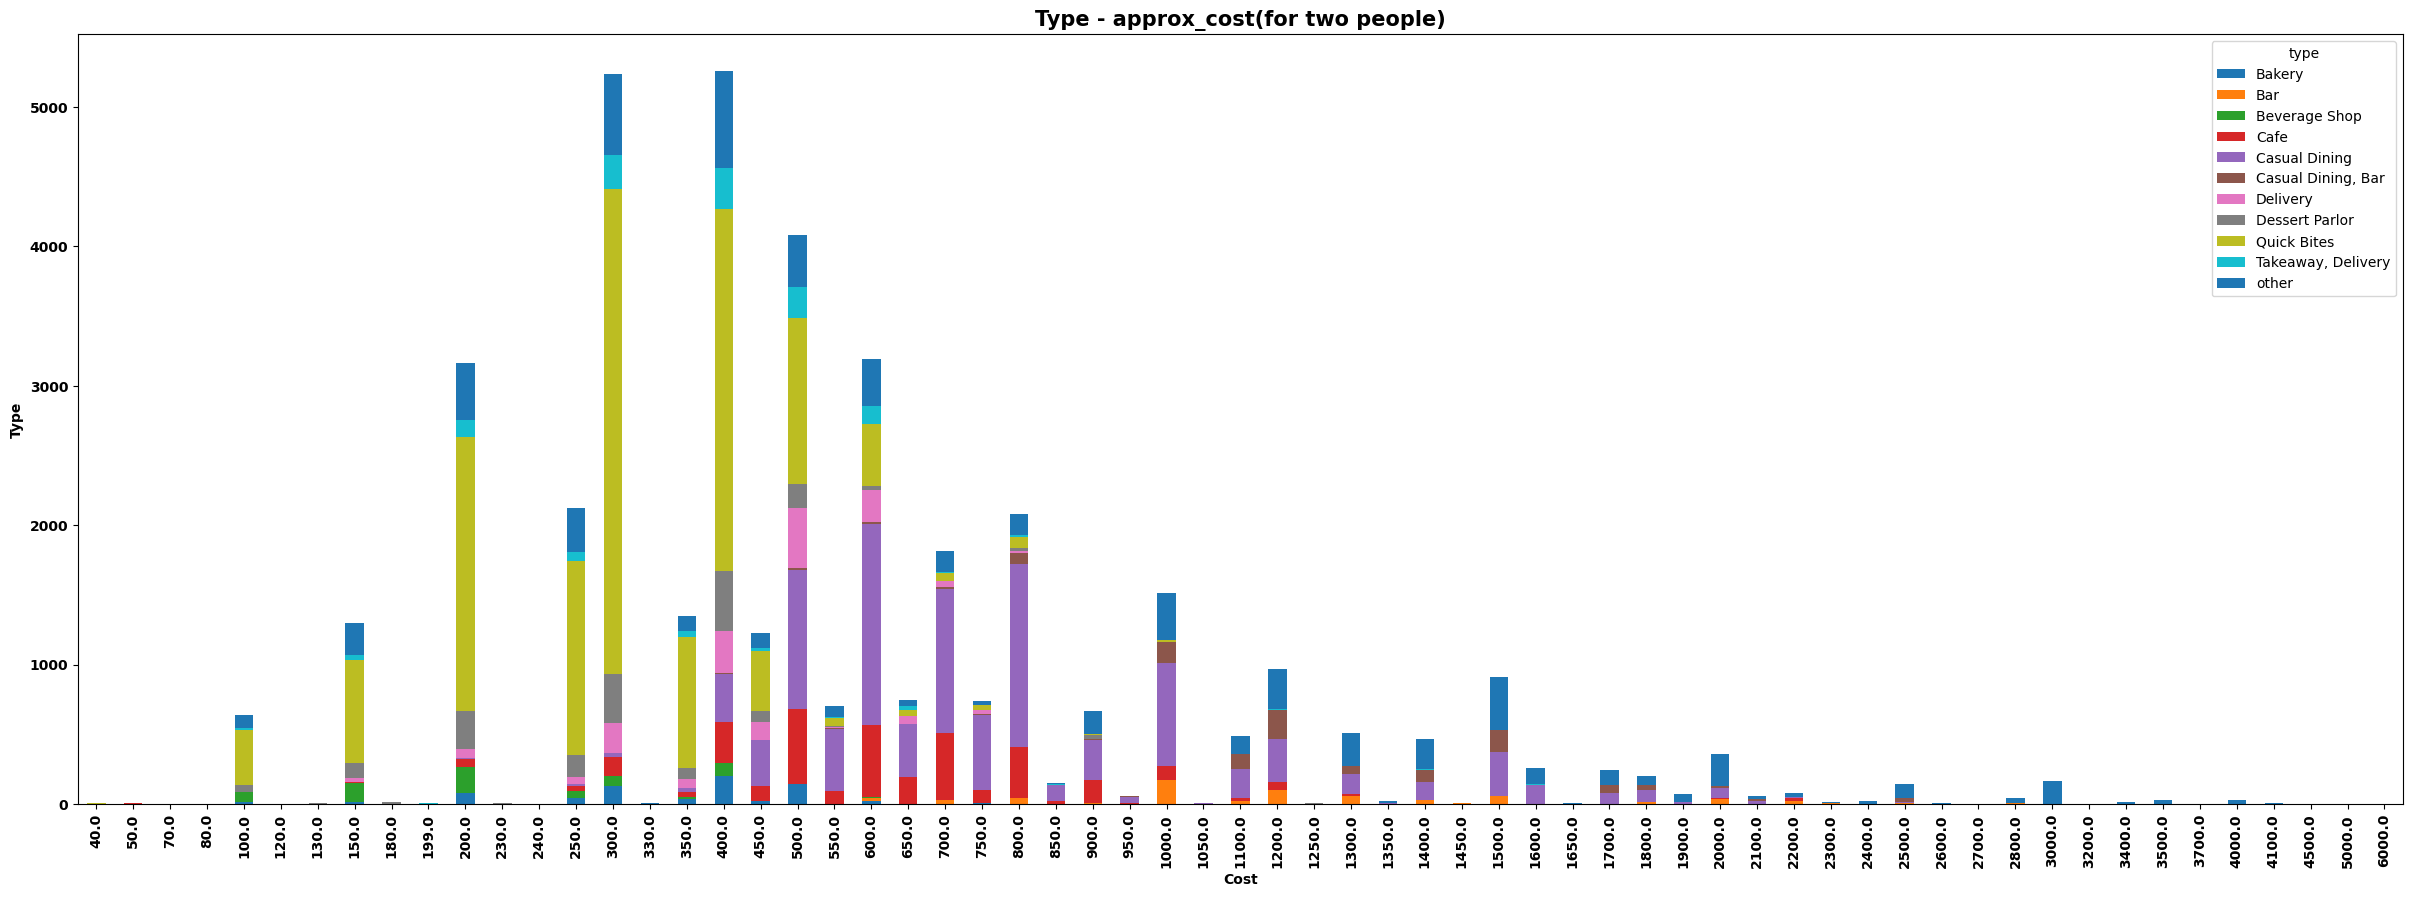

In [530]:

plt.rcParams["figure.figsize"] = (30,10)
type_plt=pd.crosstab(df['approx_cost(for two people)'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - approx_cost(for two people)',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Cost',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [1]:
import plotly.express as px

: 

In [532]:
# sns.boxplot(data = df, y="approx_cost(for two people)", x="type").set(title = "Type - approx_cost(for two people)")
# df = px.data.tips()
fig = px.box(df, y="approx_cost(for two people)", x="type")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**Observation**:
  * approx_cost for two people in casual dining is around 600-900
  * approx_cost for two people in quick bites is around 200-400
  * approx_cost for two people in cafe  is around 500-800
  * number of bar having less than 1000 approx_cost for two people in banglur is very rare
  * number of cafes having greater than 1000 approx_cost for two people in banglur is very rare ( cost 400-850 )


**Most famous restaurant in Bangalore**

---



C:\Users\anakh\AppData\Local\Temp\ipykernel_6296\3221792980.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Number of outlets')

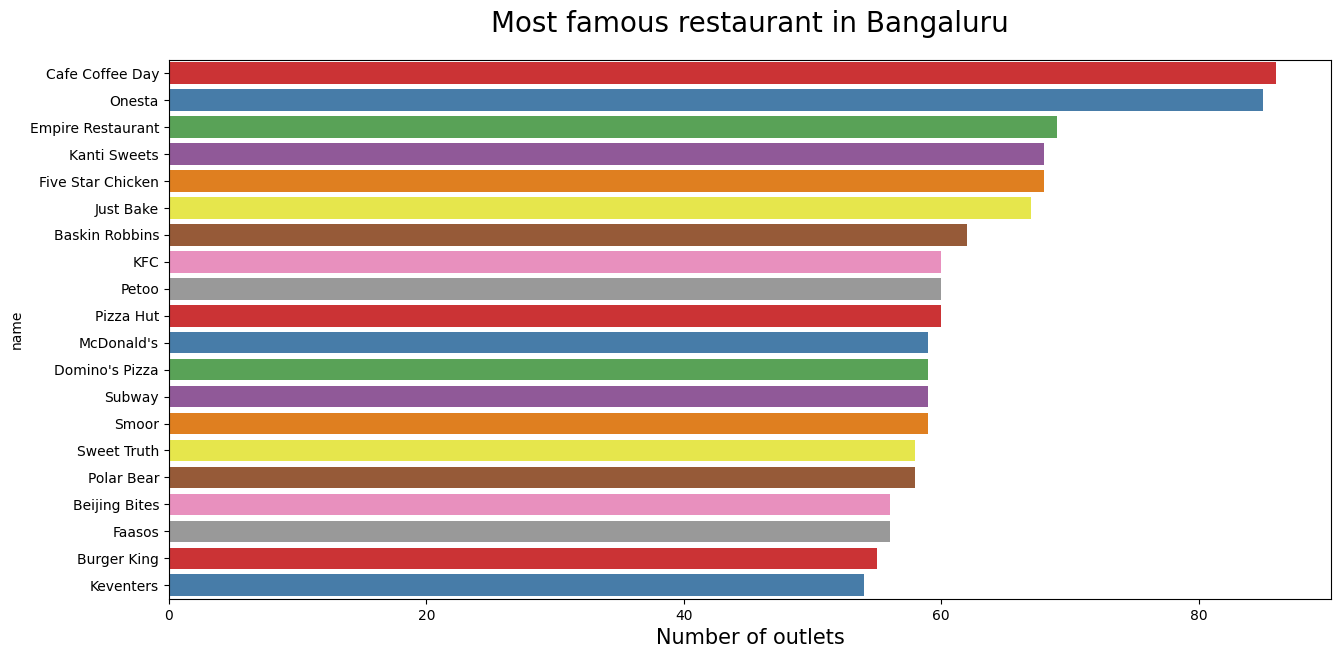

In [533]:
### most famous rest in Bangaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### WordCloud

In [534]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

In [535]:
df_cp = df.copy()
df_cp.dropna(subset = ["dish_liked"],inplace=True)
print("no:of null values in dish_liked ==>",df_cp["dish_liked"].isnull().sum())

no:of null values in dish_liked ==> 0


In [536]:
x = lambda x : x.split(",") if type(x) == str else [""]
df_cp["dish_liked"] = df_cp["dish_liked"].apply(x)
df_cp.head(3)

name  online_order  book_table  rate  votes      location  \
0            Jalsa             1           1   4.1    775  Banashankari   
1   Spice Elephant             1           0   4.1    787  Banashankari   
2  San Churro Cafe             1           0   3.8    918  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...   
1        Casual Dining  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...   
2  Cafe, Casual Dining  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)           type  
0          Buffet    Banashankari  Casual Dining  
1          Buffet    Banashankari  Casual Dining  
2          Buffet    Banashankari          other

* dish liked is in the form of string 
  * converting it into list to form word cloud of it

**Word cloud of resturants types most liked dishes**

---



In [537]:
#create word cloud
def create_word_cloud(rest_type):
  # plt.title("word cloud of liked dishes in 9 type restarent")
  plt.figure(figsize = (20,30))
 
  for i,rest in enumerate(rest_type):
    dishes = ""
    plt.subplot(3,3,i+1)
    data = df_cp[df_cp["rest_type"] == rest]
    for words in data["dish_liked"]:
      tmp = []
      for word in words:
        tmp.append(word.lower())
      dishes += " ".join(tmp) + " "
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(dishes)  
    plt.imshow(wordcloud)
    plt.title(rest)

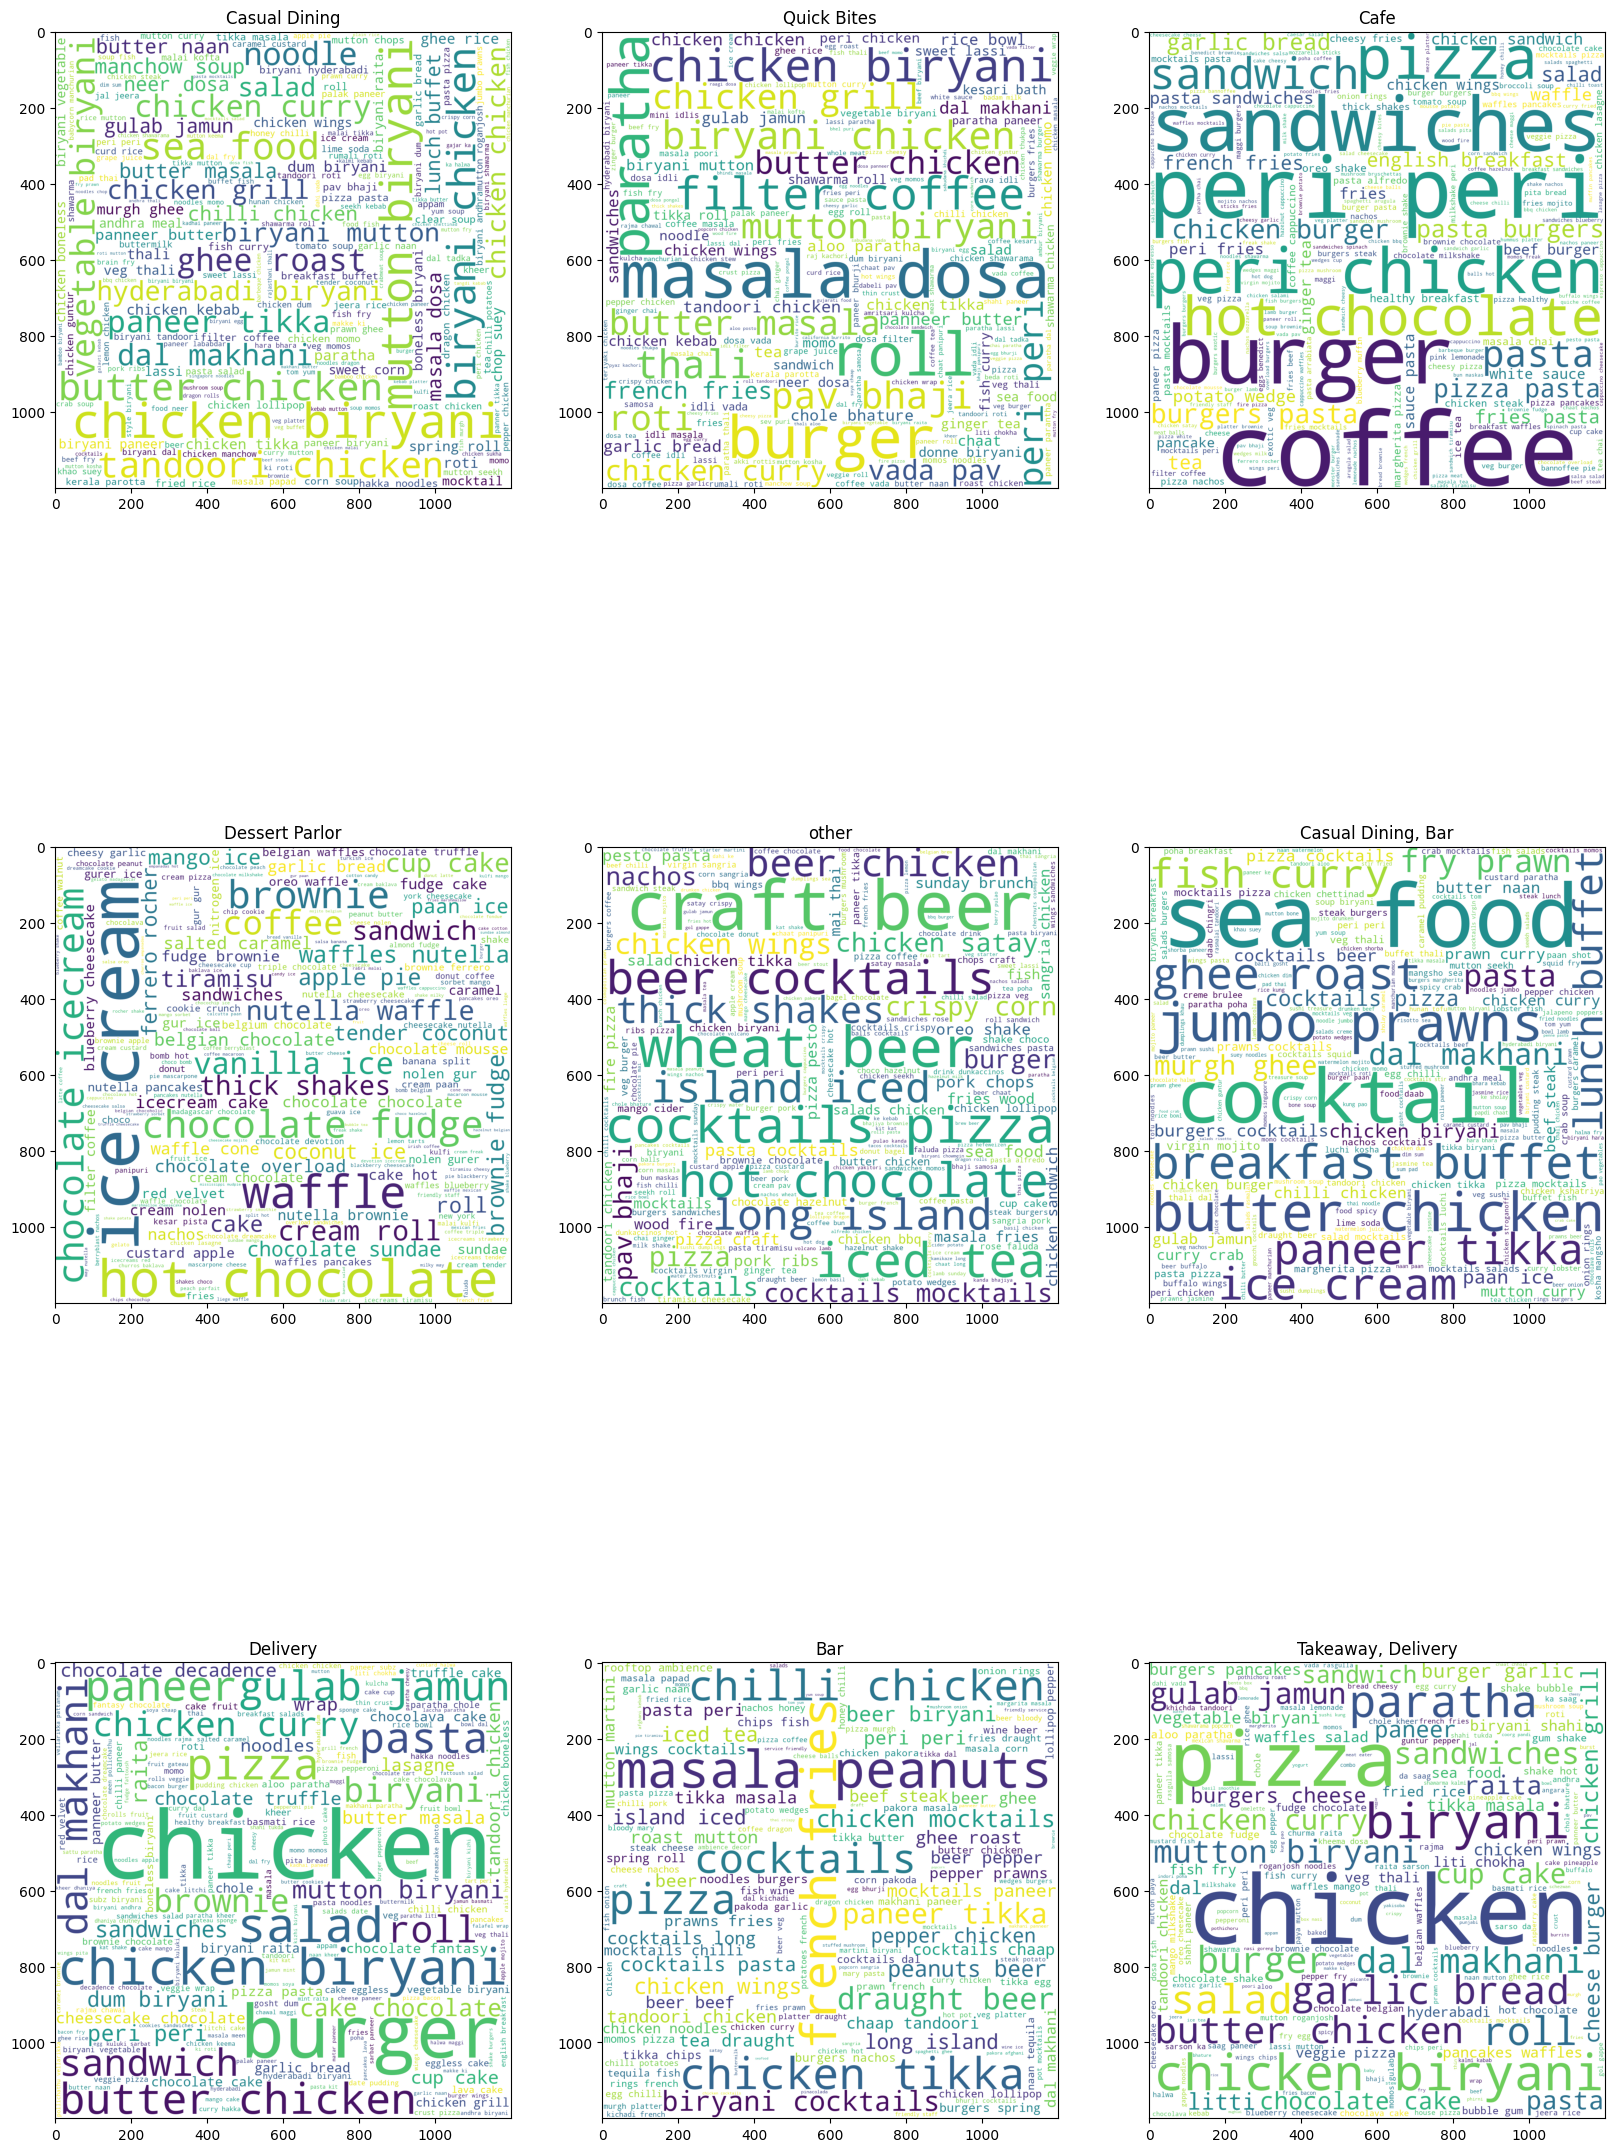

In [538]:
rest_types = df_cp["rest_type"].value_counts()[:9].index
create_word_cloud(rest_types)

**Word cloud of most provided cuisines in bangalore**

---



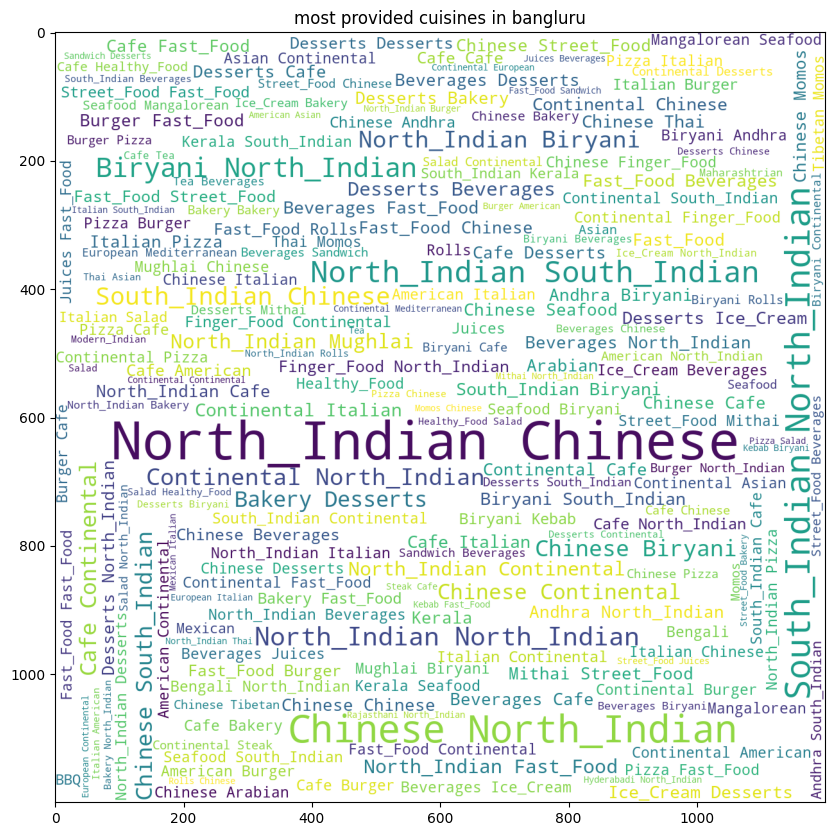

In [539]:
#most provided cuisines in bangluru
def word_cloud_cuisines(data):
  cuisines = ""
  for cu in data:
    cuisines +=  " " + cu + " "
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(cuisines)  
  plt.imshow(wordcloud)
  plt.title("most provided cuisines in bangluru")

word_cloud_cuisines(df["cuisines"].str.replace(" ","_").str.replace(",_", " "))

Observation:
Top 3 cuisines in bangalore
  1. North indian
  2. Chinese
  3. South indian

# Feature Engineering 

In [540]:
new_df = df.copy()

In [541]:
new_df

name  online_order  \
0                                                  Jalsa             1   
1                                         Spice Elephant             1   
2                                        San Churro Cafe             1   
3                                  Addhuri Udupi Bhojana             0   
4                                          Grand Village             0   
...                                                  ...           ...   
51709                         The Farm House Bar n Grill             0   
51711                                            Bhagini             0   
51712  Best Brews - Four Points by Sheraton Bengaluru...             0   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...             0   
51716                       The Nest - The Den Bengaluru             0   

       book_table  rate  votes                    location  \
0               1   4.1    775                Banashankari   
1               0   4.1    787                Banashankari   
2               0   3.8    918                Banashankari   
3               0   3.7     88                Banashankari   
4               0   3.8    166                Basavanagudi   
...           ...   ...    ...                         ...   
51709           0   3.7     34                  Whitefield   
51711           0   2.5     81                  Whitefield   
51712           0   3.6     27                  Whitefield   
51715           1   4.3    236  ITPL Main Road, Whitefield   
51716           0   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51709   Casual Dining, Bar                                                NaN   
51711   Casual Dining, Bar                               Biryani, Andhra Meal   
51712                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                          cuisines  \
0                   North Indian, Mughlai, Chinese   
1                      Chinese, North Indian, Thai   
2                           Cafe, Mexican, Italian   
3                       South Indian, North Indian   
4                         North Indian, Rajasthani   
...                                            ...   
51709                    North Indian, Continental   
51711  Andhra, South Indian, Chinese, North Indian   
51712                                  Continental   
51715                                  Finger Food   
51716       Finger Food, North Indian, Continental   

       approx_cost(for two people)  \
0                            800.0   
1                            800.0   
2                            800.0   
3                            300.0   
4                            600.0   
...                            ...   
51709                        800.0   
51711                        800.0   
51712                       1500.0   
51715                       2500.0   
51716                       1500.0   

                                            reviews_list menu_item  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1      [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3      [('Rated 4.0', "RATED\n  Great food and proper...   

In [542]:
#drop_cols = ["name","rest_type","dish_liked", "reviews_list", "menu_item", "listed_in(city)"]

In [543]:
drop_cols = ["rest_type","dish_liked", "reviews_list", "menu_item", "listed_in(city)"]

* droping this columns because it's not importent or not required for this problem [ **zomato resturant rate prediction** ]

In [544]:
new_df.drop(drop_cols, axis = 1,inplace = True)
new_df

name  online_order  \
0                                                  Jalsa             1   
1                                         Spice Elephant             1   
2                                        San Churro Cafe             1   
3                                  Addhuri Udupi Bhojana             0   
4                                          Grand Village             0   
...                                                  ...           ...   
51709                         The Farm House Bar n Grill             0   
51711                                            Bhagini             0   
51712  Best Brews - Four Points by Sheraton Bengaluru...             0   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...             0   
51716                       The Nest - The Den Bengaluru             0   

       book_table  rate  votes                    location  \
0               1   4.1    775                Banashankari   
1               0   4.1    787                Banashankari   
2               0   3.8    918                Banashankari   
3               0   3.7     88                Banashankari   
4               0   3.8    166                Basavanagudi   
...           ...   ...    ...                         ...   
51709           0   3.7     34                  Whitefield   
51711           0   2.5     81                  Whitefield   
51712           0   3.6     27                  Whitefield   
51715           1   4.3    236  ITPL Main Road, Whitefield   
51716           0   3.4     13  ITPL Main Road, Whitefield   

                                          cuisines  \
0                   North Indian, Mughlai, Chinese   
1                      Chinese, North Indian, Thai   
2                           Cafe, Mexican, Italian   
3                       South Indian, North Indian   
4                         North Indian, Rajasthani   
...                                            ...   
51709                    North Indian, Continental   
51711  Andhra, South Indian, Chinese, North Indian   
51712                                  Continental   
51715                                  Finger Food   
51716       Finger Food, North Indian, Continental   

       approx_cost(for two people) listed_in(type)                type  
0                            800.0          Buffet       Casual Dining  
1                            800.0          Buffet       Casual Dining  
2                            800.0          Buffet               other  
3                            300.0          Buffet         Quick Bites  
4                            600.0          Buffet       Casual Dining  
...                            ...             ...                 ...  
51709                        800.0   Pubs and bars  Casual Dining, Bar  
51711                        800.0   Pubs and bars  Casual Dining, Bar  
51712                       1500.0   Pubs and bars                 Bar  
51715                       2500.0   Pubs and bars                 Bar  
51716                       1500.0   Pubs and bars               other  

[41226 rows x 10 columns]

In [545]:
new_df["cuisines"] = new_df["cuisines"].str.lower()
new_df["location"] = new_df["location"].str.lower()
new_df["listed_in(type)"] = new_df["listed_in(type)"].str.lower()
new_df["type"] = new_df["type"].str.lower()
new_df["name"] = new_df["name"].str.lower()

* converting all strings into lower cases for avoide duplicate feature values

In [546]:
new_df["cuisines"][0]

'north indian, mughlai, chinese'

In [547]:
new_df["type"].nunique()

11

In [548]:
new_df["cuisines"].nunique()

2367

In [549]:
new_df["name"].nunique()

6572

* we should have to reduc the number of values of cuisines

In [550]:
new_df["listed_in(type)"].nunique()

7

In [551]:
new_df["location"].nunique()

92

**reducing the number of feature values by replacing the least freaquent values as `other` catagory**



---




In [552]:
cols = new_df["cuisines"].value_counts()[:60].index
def convert(x):
  if x in cols:
    return x
  return "other"

new_df["cuisines"] = new_df["cuisines"].apply(convert)

In [553]:
cols = new_df["location"].value_counts()[:55].index
def convert(x):
  if x in cols:
    return x
  return "other"

new_df["location"] = new_df["location"].apply(convert)

In [554]:
# cols = new_df["location"].value_counts()[:55].index
# def convert(x):
#   if x in cols:
#     return x
#   return "other"

# new_df["name"] = new_df["name"].apply(convert)

In [555]:
new_df

name  online_order  \
0                                                  jalsa             1   
1                                         spice elephant             1   
2                                        san churro cafe             1   
3                                  addhuri udupi bhojana             0   
4                                          grand village             0   
...                                                  ...           ...   
51709                         the farm house bar n grill             0   
51711                                            bhagini             0   
51712  best brews - four points by sheraton bengaluru...             0   
51715  chime - sheraton grand bengaluru whitefield ho...             0   
51716                       the nest - the den bengaluru             0   

       book_table  rate  votes      location                    cuisines  \
0               1   4.1    775  banashankari                       other   
1               0   4.1    787  banashankari                       other   
2               0   3.8    918  banashankari                       other   
3               0   3.7     88  banashankari  south indian, north indian   
4               0   3.8    166  basavanagudi                       other   
...           ...   ...    ...           ...                         ...   
51709           0   3.7     34    whitefield   north indian, continental   
51711           0   2.5     81    whitefield                       other   
51712           0   3.6     27    whitefield                 continental   
51715           1   4.3    236         other                 finger food   
51716           0   3.4     13         other                       other   

       approx_cost(for two people) listed_in(type)                type  
0                            800.0          buffet       casual dining  
1                            800.0          buffet       casual dining  
2                            800.0          buffet               other  
3                            300.0          buffet         quick bites  
4                            600.0          buffet       casual dining  
...                            ...             ...                 ...  
51709                        800.0   pubs and bars  casual dining, bar  
51711                        800.0   pubs and bars  casual dining, bar  
51712                       1500.0   pubs and bars                 bar  
51715                       2500.0   pubs and bars                 bar  
51716                       1500.0   pubs and bars               other  

[41226 rows x 10 columns]

**splitting the dataset into train and test [ before any preprocessing `to avoide data leakage` ]**

---



In [556]:
from sklearn.model_selection import train_test_split

X = new_df.drop(["rate"], axis =1)
y = new_df["rate"]

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1337)

In [558]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((32980, 9), (8246, 9), (32980,), (8246,))

**Baseline Model**

---



In [559]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.ensemble import RandomForestRegressor

In [560]:
def base_model_evaluation(X_train,y_train,X_test,y_test):
  base_model = RandomForestRegressor()
  base_model.fit(X_train, y_train)
  score = base_model.score(X_test,y_test)
  y_pred = base_model.predict(X_test)
  mse = MSE(y_test, y_pred)
  rmse = np.sqrt(MSE(y_test, y_pred))
  mae = MAE(y_test, y_pred)  
  print(f"score => {score}\nmse => {mse}\nrmse => {rmse}\nmae => {mae}\n")
  plt.title("prediction vs actual values difference")
  plt.scatter(x = range(0,y_test.shape[0]),y = y_pred - y_test)
  plt.plot([0]*y_test.shape[0],c = "r", linewidth = '5.5')
  plt.show()

**Label encoding**

---



In [561]:
from sklearn.preprocessing import LabelEncoder

type_transform = LabelEncoder()
cuisines_transform = LabelEncoder()
listed_in_type_transform = LabelEncoder()
location_transform = LabelEncoder()
location_name = LabelEncoder()

# 'location', 'cuisines', 'listed_in(type)', 'type'

In [562]:
X_train["type"] = type_transform.fit_transform(X_train["type"])
X_train["cuisines"] = cuisines_transform.fit_transform(X_train["cuisines"])
X_train["listed_in(type)"] = listed_in_type_transform.fit_transform(X_train["listed_in(type)"])
X_train["location"] = location_transform.fit_transform(X_train["location"])
X_train["name"] = location_transform.fit_transform(X_train["name"])

In [563]:
X_test["type"] = type_transform.transform(X_test["type"])
X_test["cuisines"] = cuisines_transform.transform(X_test["cuisines"])
X_test["listed_in(type)"] = listed_in_type_transform.transform(X_test["listed_in(type)"])
X_test["location"] = location_transform.fit_transform(X_test["location"])
X_test["name"] = location_transform.fit_transform(X_test["name"])

In [564]:
X_train

name  online_order  book_table  votes  location  cuisines  \
8615   4356             1           0    670         9        38   
29303  6005             0           0  14710        29        51   
2779   5174             1           0     22         3        51   
21109  3780             1           0     80        21        51   
44380  2215             1           0    638        39        51   
...     ...           ...         ...    ...       ...       ...   
27770  3988             1           0      5        18        51   
24829  1259             1           0     16        24        10   
11847  3634             1           0    382        52        51   
42253  1040             1           0      9        49        14   
3978   2886             1           0     85        46        51   

       approx_cost(for two people)  listed_in(type)  type  
8615                         500.0                2     4  
29303                        900.0                1     8  
2779                         250.0                2     8  
21109                        750.0                4     4  
44380                        700.0                3     3  
...                            ...              ...   ...  
27770                        300.0                2    10  
24829                        350.0                4     9  
11847                        500.0                2     3  
42253                        300.0                1     3  
3978                         400.0                2     4  

[32980 rows x 9 columns]

**Data Correaltions**

---



<Axes: >

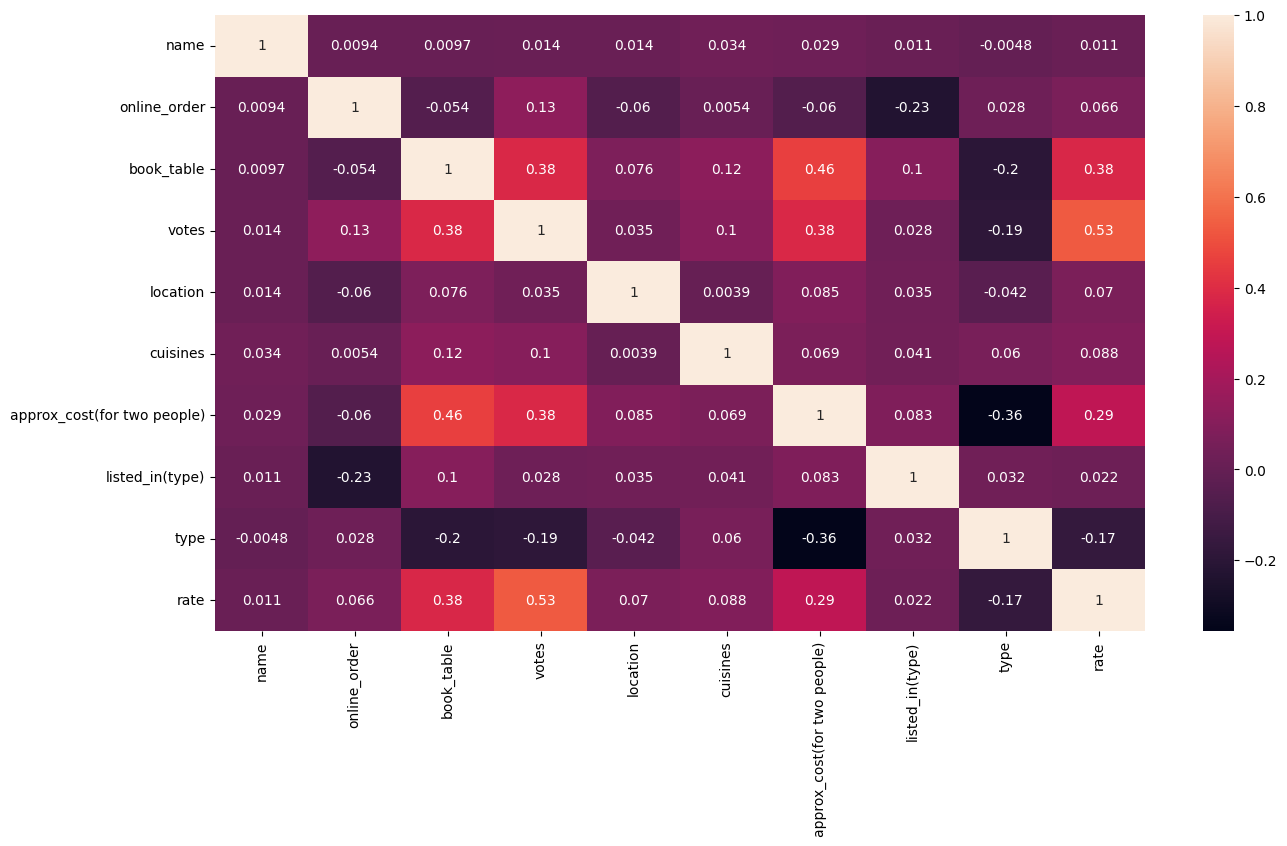

In [565]:
#Get Correlation between different variables
data = pd.concat([X_train,y_train], axis = 1)
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
# df.columns

**baseline model evaluation on encoded dataset**

---



score => 0.7547138025315914
mse => 0.047626513702178214
rmse => 0.21823499651105047
mae => 0.14671153046498056



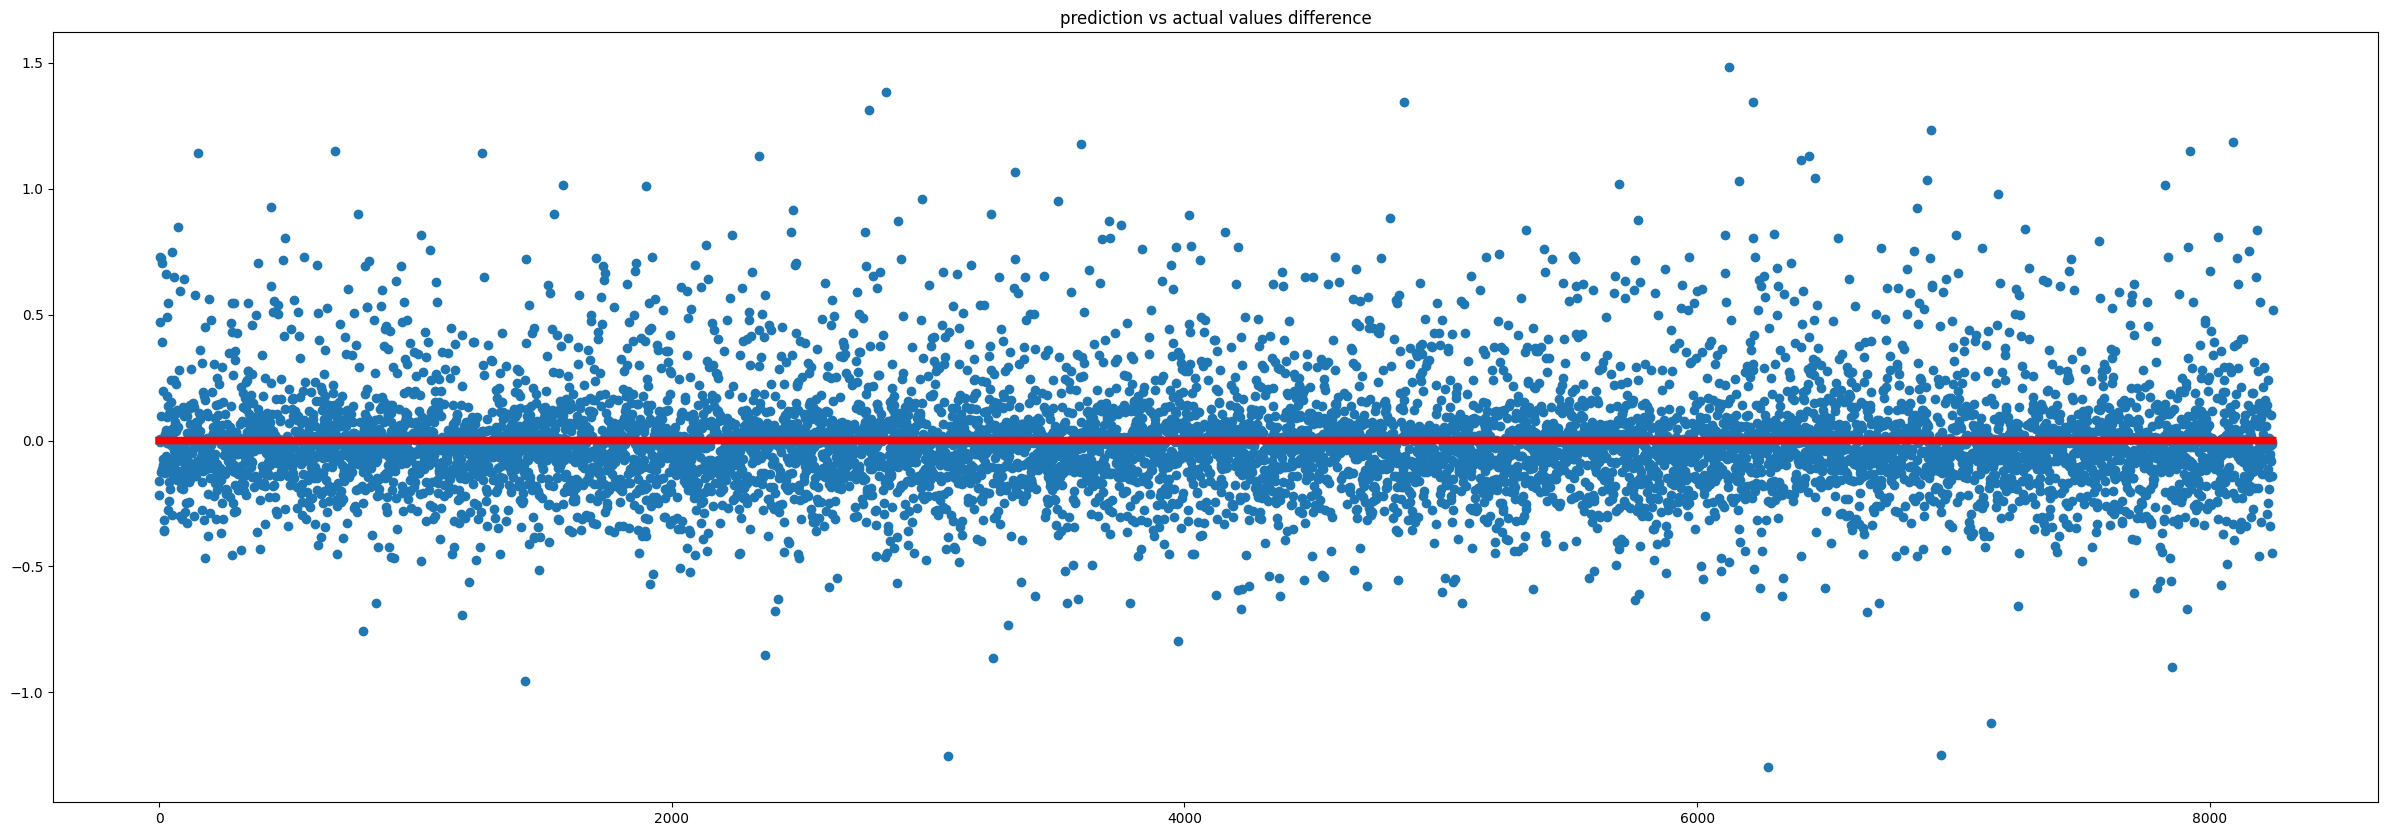

In [566]:
base_model_evaluation(X_train,y_train,X_test,y_test)

# Save dataset and encoders

In [567]:
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

In [568]:
train_data.to_csv("train.csv")

In [569]:
df = pd.read_csv("train.csv")
df

Unnamed: 0  name  online_order  book_table  votes  location  cuisines  \
0            8615  4356             1           0    670         9        38   
1           29303  6005             0           0  14710        29        51   
2            2779  5174             1           0     22         3        51   
3           21109  3780             1           0     80        21        51   
4           44380  2215             1           0    638        39        51   
...           ...   ...           ...         ...    ...       ...       ...   
32975       27770  3988             1           0      5        18        51   
32976       24829  1259             1           0     16        24        10   
32977       11847  3634             1           0    382        52        51   
32978       42253  1040             1           0      9        49        14   
32979        3978  2886             1           0     85        46        51   

       approx_cost(for two people)  listed_in(type)  type  rate  
0                            500.0                2     4   3.9  
1                            900.0                1     8   4.7  
2                            250.0                2     8   3.7  
3                            750.0                4     4   3.5  
4                            700.0                3     3   4.1  
...                            ...              ...   ...   ...  
32975                        300.0                2    10   3.4  
32976                        350.0                4     9   3.0  
32977                        500.0                2     3   4.2  
32978                        300.0                1     3   3.4  
32979                        400.0                2     4   3.1  

[32980 rows x 11 columns]

In [570]:
test_data.to_csv("test.csv")


In [571]:
df = pd.read_csv("test.csv")
df

Unnamed: 0  name  online_order  book_table  votes  location  cuisines  \
0          12147  1923             1           0     33        12        24   
1          36031  2197             0           0    339        21        51   
2          14635  2586             1           0   1133        20        51   
3          48336  1404             0           0     44         7        38   
4          24003  3812             1           0     64        38        18   
...          ...   ...           ...         ...    ...       ...       ...   
8241       29882   798             1           1   1854        30        18   
8242       30619  1806             0           0      7        30        51   
8243       21035  2925             0           1    545        21        51   
8244       24627  1332             0           0     53        25        51   
8245       32687  1628             1           0     24         9        38   

      approx_cost(for two people)  listed_in(type)  type  rate  
0                           400.0                2     7   4.1  
1                           550.0                2     4   4.0  
2                           800.0                1     3   4.3  
3                           300.0                4     8   3.6  
4                           700.0                2     8   2.7  
...                           ...              ...   ...   ...  
8241                       1100.0                2     4   4.4  
8242                        300.0                2     6   3.4  
8243                       1100.0                4     4   4.6  
8244                        350.0                3     8   3.7  
8245                        250.0                2     9   2.9  

[8246 rows x 11 columns]

In [572]:
import pickle

output = open('type_encoder.pkl', 'wb')
pickle.dump(type_transform, output)
output.close()

output = open('cuisines_encoder.pkl', 'wb')
pickle.dump(cuisines_transform, output)
output.close()

output = open('listed_in_type_encoder.pkl', 'wb')
pickle.dump(listed_in_type_transform, output)
output.close()

output = open('location_encoder.pkl', 'wb')
pickle.dump(location_transform, output)
output.close()

output = open('name_encoder.pkl', 'wb')
pickle.dump(location_transform, output)
output.close()